Exploratory Data Analysis on the CMU movie corpus - A journey
===============================================================

> **Author:** Satvik Bajpai, U20220103





# Table of Contents

>[Exploratory Data Analysis on the CMU movie corpus - A journey](#scrollTo=dFc6lE3lAgdX)

>[Table of Contents](#scrollTo=mJZhys3pAcBn)

>[Imports](#scrollTo=WxmLV15t_qNz)

>[Loading the Dataset](#scrollTo=Ok3Hf1dm_vJ9)

>[Pre-Processing Datasets](#scrollTo=W9L3IeZw_yCA)

>[Basic Data Visualiztion](#scrollTo=9OUQM6wXjqRI)

>>[Box Office Revenue vs. Runtime of Movies](#scrollTo=IKQAs7q7W8kM)

>>>[Is there a correlation between the runtime of a movie and the amount of revenue it generates?](#scrollTo=TEK96zsAAAtp)

>>[Most Common words in movie plots](#scrollTo=h1SF-_1a_fdh)

>>>[What are the most frequent words (themes) in movie  plots?](#scrollTo=AVPUWfJl8f7F)

>>[Movie Genres](#scrollTo=8YyfL_7pB1ew)

>>>[What are the top 20 movie genres by count?](#scrollTo=w1IlOs2fB5An)

>>>[What are the top 20 movie genres by revenue?](#scrollTo=4oJfj7YsDMfG)

>>[Movie Country](#scrollTo=AOaDhUM5EFAo)

>>>[What are the top-20 countries by movie count?](#scrollTo=lDyFyn8rFe4D)

>>>[Top Countries by movie count vs Top countries by movie revenue](#scrollTo=1j3jwfLZIlgK)

>>[Movie Language](#scrollTo=o0jIvun_H9Ih)

>>>[What are the top-20 movies by language?](#scrollTo=8XWilIynIBur)

>>>[Top Movies by Langauge Count vs Top Movies by Language Revenue](#scrollTo=7muuF2r2IbGp)

>>[Box-Office Revenue](#scrollTo=K5ljpUjuKBtt)

>>>[Trends in total movie revenue over the years.](#scrollTo=S80HE0QCKxgh)

>>>[Movie Runtime vs Release Year](#scrollTo=IXz_T4DMLP9y)

>>[Actor Age](#scrollTo=8BLzUCGlPEjE)

>>>[Histogram of Actor Age](#scrollTo=kR1OJhArVv5D)

>>>[How does the genre in which the actor acts vary over age?](#scrollTo=j-IvjSIHnlqa)

>>>[Most Common Character Names](#scrollTo=xptqXhEDntz9)

>[Bechdel Test](#scrollTo=GnXLj6X_rEKJ)

>>[Dataset Loading](#scrollTo=5FPkymIsn7Gu)

>>[Bechdel Test Plotting](#scrollTo=V9Jq44OZsRVZ)

>>>[Numbe of movies in the CMU dataset vs Bechdel Test Dataset](#scrollTo=gBGKr32Rq_5f)

>>>[Merging the two dataframes](#scrollTo=5vdJmjEArhRn)

>>[Bechdel Dataset Ratings Basic Visualization](#scrollTo=KCRLf5VPsE8M)

>>>[Bechdel Test: Pass vs Fail](#scrollTo=HTC1Bij5tDZ5)

>>>[Proportion of Bechdel Test Rating across different genres](#scrollTo=8eAXOwUKtMkh)

>>>[Q. Is there a correlation between the number of female actors starring in a movie vs. whether the movie will pass the Bechdel test or not?](#scrollTo=eRaY9RUHUouG)

>>>[Q. Is there a correlation between the gender of the director of the movie vs whether the movies passes the Bechdel Test or not?](#scrollTo=PffIRU86KNuP)

>>>[Q. Do Bechdel Test Ratings differ across different genres of the movies?](#scrollTo=aPZoagIIU7Ty)

>>>>[Plotting the Bechdel pass vs. fail results across different movie genres](#scrollTo=Tas94hoVMDqi)

>>>>[Political Drama](#scrollTo=oo99FuVLVH54)

>>>>[Comedy](#scrollTo=C50PCm_TVLnX)

>>>>[Drama](#scrollTo=PeEDEwxFVNz9)

>>>>[Animation](#scrollTo=ogyCithcVPhV)

>>>>[LGBT](#scrollTo=6m2itABNVRTq)

>>>>[Teen](#scrollTo=IOmPXErvVTTT)

>>>>[Biographical](#scrollTo=xhCuDMVKVU4M)

>>>>[Adventure](#scrollTo=yzsMg5mOVYzt)

>>>>[Action](#scrollTo=z4SHByxZVarP)

>>>>[Superhero](#scrollTo=v9_n3PFBVcjb)

>>>>[Thriller](#scrollTo=9DwqFPltVqmP)

>>>[Graph Visualization](#scrollTo=Jy39hBbgArVV)

>[Sentiment Analysis vs. Movie plots](#scrollTo=ssfp3GYqNZ3Z)

>>[Merging the dataset](#scrollTo=5i7KbhSKQDsG)

>>[Preprocessing the plot summaries using NLP Pipeline](#scrollTo=tZs9gfJnQKW-)

>>[Calculating and Plotting the sentiment scores](#scrollTo=ghU5gYMuQQQz)

>>[Q. Is there a correlation between the sentiment of the movie and the amount of revenue it generates?](#scrollTo=lk1VcyM3P6RA)

>[A beautiful poem](#scrollTo=RXGN5xBaWLJD)

>[Acknowledgement](#scrollTo=Y2IJcAPbWZZF)



# Imports

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from tqdm import tqdm
import geopandas as gpd
import ast
from scipy import stats
from google.colab import drive
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from nltk.corpus import stopwords
import warnings
import nltk
import os
import re
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter
import networkx as nx
from textblob import TextBlob
import pyLDAvis
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from empath import Empath

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

!pip install pyLDAvis
!pip install vaderSentiment
!pip install empath


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Use `pip` or `conda` to install the missing dependencies

In [2]:
warnings.filterwarnings('ignore') #ignore any warnings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
drive.mount('/content/drive') #mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Note:** This step is only requires on Google Colab.



# Loading the Dataset

In [4]:
#defining the path to the datasets
movie_metadata_path = "/content/drive/My Drive/Datasets/MovieSummaries/movie.metadata.tsv"
character_metadata_path = "/content/drive/My Drive/Datasets/MovieSummaries/character.metadata.tsv"
plot_summaries_path = "/content/drive/My Drive/Datasets/MovieSummaries/plot_summaries.txt"

In [5]:
#loading the datasets into pandas dataframes
movie_metadata = pd.read_csv(movie_metadata_path, sep="\t", header=None)
character_metadata = pd.read_csv(character_metadata_path, sep="\t", header=None)
plot_summaries = pd.read_csv(plot_summaries_path, sep="\t")
# imdb_df = pd.read_csv(imdb_df_path, sep="\t")
# imdb_names = pd.read_csv(imdb_names_path, sep="\t")


# Pre-Processing Datasets

In [6]:
#assigning column names to movie_metadata
movie_metadata.columns = [
    "wiki_movie_id",
    "freebase_movie_id",
    "movie_name",
    "movie_release_date",
    "movie_box_office_revenue",
    "movie_runtime",
    "movie_languages",
    "movie_countries",
    "movie_genres",
]

In [7]:
#assigning column names to character_metadata
character_metadata.columns = [
    "wiki_movie_id",
    "freebase_movie_id",
    "movie_release_date",
    "character_name",
    "actor_dob",
    "actor_gender",
    "actor_height",
    "actor_ethnicity",
    "actor_name",
    "actor_age",
    "freebase_char_map_id",
    "freebase_char_id",
    "freebase_actor_id",
]

In [8]:
#assigning column names to plot_summaries
plot_summaries.columns = [
    "wiki_movie_id",
    "plot_summary"
]

In [9]:
# #assigning column names to name_clusters
# name_clusters.columns = ["freebase_char_map_id", "character_name"]

In [10]:
#pre-processing movie_metadata
movie_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wiki_movie_id             81741 non-null  int64  
 1   freebase_movie_id         81741 non-null  object 
 2   movie_name                81741 non-null  object 
 3   movie_release_date        74839 non-null  object 
 4   movie_box_office_revenue  8401 non-null   float64
 5   movie_runtime             61291 non-null  float64
 6   movie_languages           81741 non-null  object 
 7   movie_countries           81741 non-null  object 
 8   movie_genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [11]:
#checking for null values
print(movie_metadata.isnull().sum())

wiki_movie_id                   0
freebase_movie_id               0
movie_name                      0
movie_release_date           6902
movie_box_office_revenue    73340
movie_runtime               20450
movie_languages                 0
movie_countries                 0
movie_genres                    0
dtype: int64


In [12]:
#making a new dataframe with not null box office revenue
box_office_revenue = movie_metadata[movie_metadata["movie_box_office_revenue"].notnull()]

#dropping all rows with missing box office revenue
box_office_revenue.dropna(inplace=True, axis = 0)

#dropping columns with more than 50% missing values
movie_metadata.dropna(thresh=0.5 * len(movie_metadata), axis=1, inplace=True)

#filling movie_runtime missing values with mean value
movie_metadata["movie_runtime"].fillna(
    movie_metadata["movie_runtime"].mean(), inplace=True
)

I am keeping the dataframes required for answering different questions separate. You will observe this later as well!

In [13]:
#converting all the values in wiki_movie_id to int64
movie_metadata["wiki_movie_id"] = movie_metadata["wiki_movie_id"].astype("int64")


#remove leading and trailing spaces from movie_name
movie_metadata["movie_name"] = movie_metadata["movie_name"].str.strip()

#converting movie_name to lower case
movie_metadata["movie_name"] = movie_metadata["movie_name"].str.lower()

#converting movie release date to string
movie_metadata["movie_release_date"] = movie_metadata["movie_release_date"].astype(str)

#finding standalone year values in movie release date
year_values = movie_metadata["movie_release_date"].str.len() < 5

# Convert year values to the first day of the year
movie_metadata.loc[year_values, "movie_release_date"] = movie_metadata.loc[year_values, "movie_release_date"] + "-01-01"


#converting movie release data to datetime (ignoring the errors)
movie_metadata["movie_release_date"] = pd.to_datetime(
    movie_metadata["movie_release_date"], errors="coerce"
)

#dropping movie_release_date missing values
movie_metadata.dropna(subset=["movie_release_date"], inplace=True, axis = 0)

#filling missing movie run time with mean value
movie_metadata["movie_runtime"].fillna(
    movie_metadata["movie_runtime"].mean(), inplace=True
)

#extracting movie language from dictionary
movie_metadata["movie_languages"] = movie_metadata["movie_languages"].apply(lambda x: eval(x))
movie_metadata["movie_languages"] = movie_metadata["movie_languages"].apply(lambda x: list(x.values()))

#extracting movie genres from dictionary
movie_metadata["movie_genres"] = movie_metadata["movie_genres"].apply(lambda x: eval(x))
movie_metadata["movie_genres"] = movie_metadata["movie_genres"].apply(lambda x: list(x.values()))

#extracting movie countries from dictionary
movie_metadata["movie_countries"] = movie_metadata["movie_countries"].apply(lambda x: eval(x))
movie_metadata["movie_countries"] = movie_metadata["movie_countries"].apply(lambda x: list(x.values()))

movie_metadata.head()


,wiki_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,ghosts of mars,2001-08-24,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,getting away with murder: the jonbenét ramsey ...,2000-02-16,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,brun bitter,1988-01-01,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,white of the eye,1987-01-01,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,a woman in flames,1983-01-01,106.0,[German Language],[Germany],[Drama]


In [14]:
#checking structure of the movie_metadata
movie_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71544 entries, 0 to 81740
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   wiki_movie_id       71544 non-null  int64         
 1   freebase_movie_id   71544 non-null  object        
 2   movie_name          71544 non-null  object        
 3   movie_release_date  71544 non-null  datetime64[ns]
 4   movie_runtime       71544 non-null  float64       
 5   movie_languages     71544 non-null  object        
 6   movie_countries     71544 non-null  object        
 7   movie_genres        71544 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 4.9+ MB


In [15]:
#converting all the values in wiki_movie_id to int64
box_office_revenue["wiki_movie_id"] = box_office_revenue["wiki_movie_id"].astype("int64")


#remove leading and trailing spaces from movie_name
box_office_revenue["movie_name"] = box_office_revenue["movie_name"].str.strip()

#converting movie_name to lower case
box_office_revenue["movie_name"] = box_office_revenue["movie_name"].str.lower()

#converting movie release date to string
box_office_revenue["movie_release_date"] = box_office_revenue["movie_release_date"].astype(str)

#finding standalone year values in movie release date
year_values = box_office_revenue["movie_release_date"].str.len() < 5

# Convert year values to the first day of the year
box_office_revenue.loc[year_values, "movie_release_date"] = box_office_revenue.loc[year_values, "movie_release_date"] + "-01-01"


#converting movie release data to datetime (ignoring the errors)
box_office_revenue["movie_release_date"] = pd.to_datetime(
    box_office_revenue["movie_release_date"], errors="coerce"
)

#dropping movie_release_date missing values
box_office_revenue.dropna(subset=["movie_release_date"], inplace=True, axis = 0)


#filling missing movie run time with mean value
box_office_revenue["movie_runtime"].fillna(
    box_office_revenue["movie_runtime"].mean(), inplace=True
)

#extracting movie language from dictionary
box_office_revenue["movie_languages"] = box_office_revenue["movie_languages"].apply(lambda x: eval(x))
box_office_revenue["movie_languages"] = box_office_revenue["movie_languages"].apply(lambda x: list(x.values()))

#extracting movie genres from dictionary
box_office_revenue["movie_genres"] = box_office_revenue["movie_genres"].apply(lambda x: eval(x))
box_office_revenue["movie_genres"] = box_office_revenue["movie_genres"].apply(lambda x: list(x.values()))

#extracting movie countries from dictionary
box_office_revenue["movie_countries"] = box_office_revenue["movie_countries"].apply(lambda x: eval(x))
box_office_revenue["movie_countries"] = box_office_revenue["movie_countries"].apply(lambda x: list(x.values()))

box_office_revenue.head()


,wiki_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,ghosts of mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
7,10408933,/m/02qc0j7,alexander's ragtime band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
13,171005,/m/016ywb,henry v,1989-11-08,10161099.0,137.0,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ..."
17,77856,/m/0kcn7,mary poppins,1964-08-27,102272727.0,139.0,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ..."
21,612710,/m/02wjqm,new rose hotel,1999-10-01,21521.0,92.0,[English Language],[United States of America],"[Thriller, Science Fiction, Future noir, Indie..."


In [16]:
box_office_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8063 entries, 0 to 81726
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   wiki_movie_id             8063 non-null   int64         
 1   freebase_movie_id         8063 non-null   object        
 2   movie_name                8063 non-null   object        
 3   movie_release_date        8063 non-null   datetime64[ns]
 4   movie_box_office_revenue  8063 non-null   float64       
 5   movie_runtime             8063 non-null   float64       
 6   movie_languages           8063 non-null   object        
 7   movie_countries           8063 non-null   object        
 8   movie_genres              8063 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 629.9+ KB


In [17]:
#pre-processing character_metadata
character_metadata.head()


,wiki_movie_id,freebase_movie_id,movie_release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_char_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [18]:
#checking for null values
character_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   wiki_movie_id         450669 non-null  int64  
 1   freebase_movie_id     450669 non-null  object 
 2   movie_release_date    440674 non-null  object 
 3   character_name        192794 non-null  object 
 4   actor_dob             344524 non-null  object 
 5   actor_gender          405060 non-null  object 
 6   actor_height          154824 non-null  float64
 7   actor_ethnicity       106058 non-null  object 
 8   actor_name            449441 non-null  object 
 9   actor_age             292556 non-null  float64
 10  freebase_char_map_id  450669 non-null  object 
 11  freebase_char_id      192804 non-null  object 
 12  freebase_actor_id     449854 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 44.7+ MB


In [19]:
#checking for null values
print(character_metadata.isnull().sum())

wiki_movie_id                0
freebase_movie_id            0
movie_release_date        9995
character_name          257875
actor_dob               106145
actor_gender             45609
actor_height            295845
actor_ethnicity         344611
actor_name                1228
actor_age               158113
freebase_char_map_id         0
freebase_char_id        257865
freebase_actor_id          815
dtype: int64


In [20]:
#dropping rows with more than 6 missing values
character_metadata.dropna(thresh=7, axis=0, inplace=True)

#filling actor_age missing values with mean value
character_metadata["actor_age"].fillna(
    character_metadata["actor_age"].mean(), inplace=True
)

#dropping movie release date missing values
character_metadata.dropna(subset=["movie_release_date"], inplace=True, axis = 0)

#finding standalone year values in movie release date
year_values = character_metadata["movie_release_date"].str.len() < 5

# Convert year values to the first day of the year
character_metadata.loc[year_values, "movie_release_date"] = character_metadata.loc[year_values, "movie_release_date"] + "-01-01"

#convert release date to datetime
character_metadata["movie_release_date"] = pd.to_datetime(
    character_metadata["movie_release_date"], errors="coerce"
)

#filling actor_height missing values with mean value
character_metadata["actor_height"].fillna(
    character_metadata["actor_height"].mean(), inplace=True
)

#dropping column ethinicity
character_metadata.drop(columns=["actor_ethnicity"], inplace=True)

#filling missing actor name with unknown
character_metadata["actor_name"].fillna("unknown", inplace=True)

#filling missing gender with unknown
character_metadata["actor_gender"].fillna("unknown", inplace=True)

#filling missing actor dob with unknown
character_metadata["actor_dob"].fillna("unknown", inplace=True)

#converting all the values in wiki_movie_id to int64
character_metadata["wiki_movie_id"] = character_metadata["wiki_movie_id"].astype("int64")

#remove leading and trailing spaces from character_name
character_metadata["character_name"] = character_metadata["character_name"].str.strip()

#converting character_name to lower case
character_metadata["character_name"] = character_metadata["character_name"].str.lower()

#converting actor_name to lower case
character_metadata["actor_name"] = character_metadata["actor_name"].str.lower()

#filling missing character name with unknown
character_metadata["character_name"].fillna("unknown", inplace=True)

#filling missing actor name with unknown
character_metadata["actor_name"].fillna("unknown", inplace=True)

#filling missing freebase_char_id with -99999999
character_metadata["freebase_char_id"].fillna(-99999999, inplace=True)

#finding standalone year values in movie release date
year_values = character_metadata["actor_dob"].str.len() < 5

# Convert year values to the first day of the year
character_metadata.loc[year_values, "actor_dob"] = character_metadata.loc[year_values, "actor_dob"] + "-01-01"

character_metadata["actor_dob"] = pd.to_datetime(
    character_metadata["actor_dob"], errors="coerce"
)

character_metadata.head()


,wiki_movie_id,freebase_movie_id,movie_release_date,character_name,actor_dob,actor_gender,actor_height,actor_name,actor_age,freebase_char_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,akooshay,1958-08-26,F,1.620,wanda de jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,lieutenant melanie ballard,1974-08-15,F,1.780,natasha henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,desolation williams,1969-06-15,M,1.727,ice cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,sgt jericho butler,1967-09-12,M,1.750,jason statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,bashira kincaid,1977-09-25,F,1.650,clea duvall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [21]:
#checiing structure of character_metadata
character_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403927 entries, 0 to 450666
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   wiki_movie_id         403927 non-null  int64         
 1   freebase_movie_id     403927 non-null  object        
 2   movie_release_date    388333 non-null  datetime64[ns]
 3   character_name        403927 non-null  object        
 4   actor_dob             334661 non-null  datetime64[ns]
 5   actor_gender          403927 non-null  object        
 6   actor_height          403927 non-null  float64       
 7   actor_name            403927 non-null  object        
 8   actor_age             403927 non-null  float64       
 9   freebase_char_map_id  403927 non-null  object        
 10  freebase_char_id      403927 non-null  object        
 11  freebase_actor_id     403927 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory us

In [22]:
#pre-processing plot_summaries
plot_summaries.head()

,wiki_movie_id,plot_summary
0,31186339,The nation of Panem consists of a wealthy Capi...
1,20663735,Poovalli Induchoodan is sentenced for six yea...
2,2231378,"The Lemon Drop Kid , a New York City swindler,..."
3,595909,Seventh-day Adventist Church pastor Michael Ch...
4,5272176,The president is on his way to give a speech. ...


In [23]:
#checking for null values
plot_summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42302 entries, 0 to 42301
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   wiki_movie_id  42302 non-null  int64 
 1   plot_summary   42302 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


In [24]:
#converting all the values in wiki_movie_id to int64
plot_summaries["wiki_movie_id"] = plot_summaries["wiki_movie_id"].astype("int64")

#remove leading and trailing spaces from plot_summary
plot_summaries["plot_summary"] = plot_summaries["plot_summary"].str.strip()

#converting plot_summary to lower case
plot_summaries["plot_summary"] = plot_summaries["plot_summary"].str.lower()

plot_summaries.head()

,wiki_movie_id,plot_summary
0,31186339,the nation of panem consists of a wealthy capi...
1,20663735,poovalli induchoodan is sentenced for six yea...
2,2231378,"the lemon drop kid , a new york city swindler,..."
3,595909,seventh-day adventist church pastor michael ch...
4,5272176,the president is on his way to give a speech. ...


In [25]:
# #preprocessing oscar_df
# oscar_df.head()

In [26]:
# #checking for null values
# oscar_df.info()

In [27]:
# print(oscar_df.isnull().sum())

In [28]:
# #filling missing values with No Film, No Name, No Year, No Ceremony, No Category
# oscar_df["film"] = oscar_df["film"].fillna("No Film")
# oscar_df["name"] = oscar_df["name"].fillna("No Name")
# oscar_df["year_film"] = oscar_df["year_film"].fillna("No Year")
# oscar_df["year_ceremony"] = oscar_df["year_ceremony"].fillna("No Year")
# oscar_df["ceremony"] = oscar_df["ceremony"].fillna("No Ceremony")
# oscar_df["category"] = oscar_df["category"].fillna("No Category")

# #converting year_film to datetime
# oscar_df["year_film"] = pd.to_datetime(oscar_df["year_film"], errors="coerce", format="%Y")

# #converting year_ceremony to datetime
# oscar_df["year_ceremony"] = pd.to_datetime(oscar_df["year_ceremony"], errors="coerce", format="%Y")

# #rename name to movie_name
# oscar_df.rename(columns={"name": "movie_name"}, inplace=True)


# oscar_df.head()

In [29]:
# #checking structure of oscar_df
# oscar_df.info()

In [30]:
# imdb_df.info()

In [31]:
# #checking for null values
# print(imdb_df.isnull().sum())

In [32]:
# imdb_df.head()

In [33]:
# #filling missing values with No Film, No Name, No Year, No Ceremony, No Category
# imdb_df["primaryTitle"] = imdb_df["primaryTitle"].fillna("No Information")
# imdb_df["originalTitle"] = imdb_df["originalTitle"].fillna("No Information")
# imdb_df["genres"] = imdb_df["genres"].fillna("No Information")

# #converting startYear to datetime
# imdb_df["startYear"] = pd.to_datetime(imdb_df["startYear"], errors="coerce", format="%Y")

# #converting endYear to datetime
# imdb_df["endYear"] = pd.to_datetime(imdb_df["endYear"], errors="coerce", format="%Y")

# #converting primaryTitle to lower case
# imdb_df["primaryTitle"] = imdb_df["primaryTitle"].str.lower()

# #converting originalTitle to lower case
# imdb_df["originalTitle"] = imdb_df["originalTitle"].str.lower()

# #converting genre to lower case
# imdb_df["genres"] = imdb_df["genres"].str.lower()

# imdb_df.head()

In [34]:
#join movie_metadata and plot_summaries
df_1 = pd.merge(movie_metadata, plot_summaries, on="wiki_movie_id")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38206 entries, 0 to 38205
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   wiki_movie_id       38206 non-null  int64         
 1   freebase_movie_id   38206 non-null  object        
 2   movie_name          38206 non-null  object        
 3   movie_release_date  38206 non-null  datetime64[ns]
 4   movie_runtime       38206 non-null  float64       
 5   movie_languages     38206 non-null  object        
 6   movie_countries     38206 non-null  object        
 7   movie_genres        38206 non-null  object        
 8   plot_summary        38206 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 2.6+ MB


In [35]:
# df_1.head()

In [36]:
# # Summary statistics
# summary_stats = df_1.describe()
# print(summary_stats)

# Basic Data Visualiztion

## Box Office Revenue vs. Runtime of Movies



### Is there a correlation between the runtime of a movie and the amount of revenue it generates?

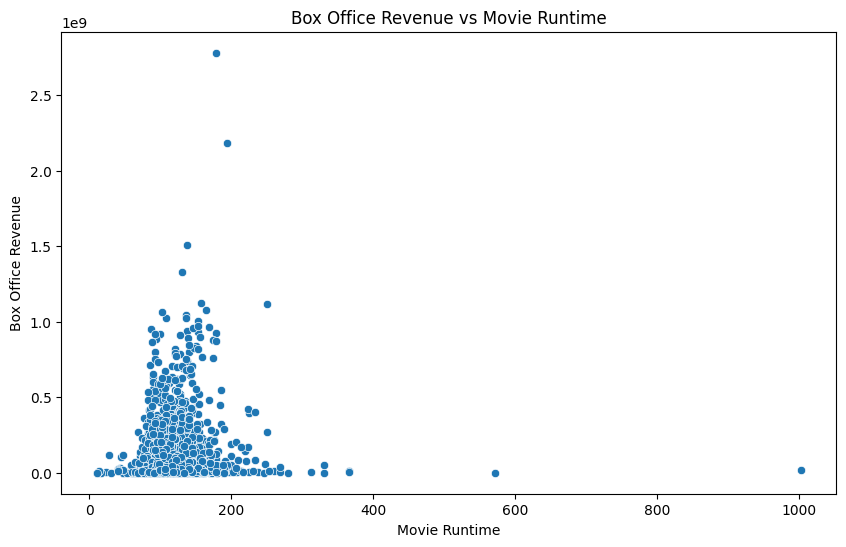

In [37]:
#box_office_revenue vs movie_runtime
plt.figure(figsize=(10, 6))
sns.scatterplot(x="movie_runtime", y="movie_box_office_revenue", data=box_office_revenue)
plt.title("Box Office Revenue vs Movie Runtime")
plt.xlabel("Movie Runtime")
plt.ylabel("Box Office Revenue")
plt.show()

This graph has a lot of information crammed in it. Let's try to see the top 10 movies by revenue and their runtimes. Also, upon checking the outlier which is a movie with a runtime of 1003 minutes, I was curious so checked it out. It was observed that this was an anamoly and the runtime is actually 103 minutes.

In [38]:
#correcting the error in the dataset
box_office_revenue.loc[box_office_revenue["movie_runtime"] == box_office_revenue["movie_runtime"].max(), "movie_runtime"] = 103

In [39]:
#checking the new value for runtime of the movie "rebound"
box_office_revenue[box_office_revenue["movie_name"] == "rebound"]

,wiki_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
57255,2551150,/m/07mjjc,rebound,2005-07-01,17492014.0,103.0,[English Language],[United States of America],"[Sports, Family Film, Comedy]"


In [40]:
# movie with longest runtime
box_office_revenue[box_office_revenue["movie_runtime"] == box_office_revenue["movie_runtime"].max()]

,wiki_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
69621,732971,/m/036ngg,the decalogue,1988-01-01,447093.0,572.0,[Polish Language],[Poland],[Drama]


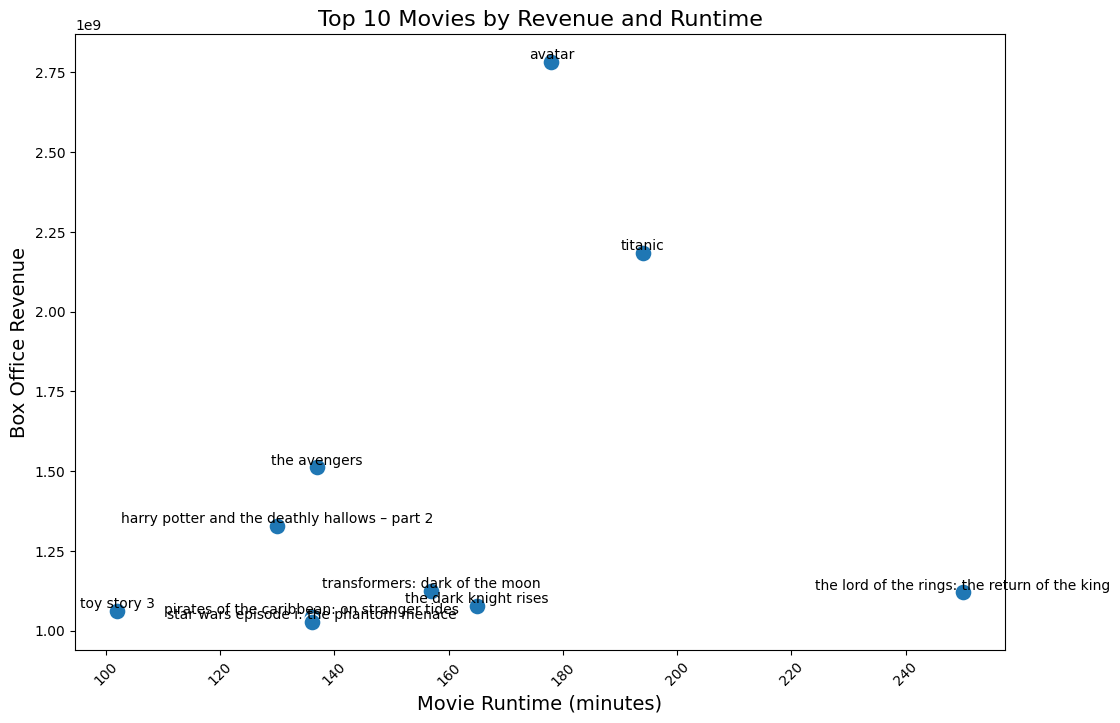

In [41]:
# Sort the data by box office revenue in descending order
top_movies = box_office_revenue.sort_values(by='movie_box_office_revenue', ascending=False).head(10)

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='movie_runtime', y='movie_box_office_revenue', data=top_movies, s=150)

# Label the data points with movie names
for i, movie in top_movies.iterrows():
    plt.text(movie['movie_runtime'], movie['movie_box_office_revenue'], movie['movie_name'], fontsize=10, ha='center', va='bottom')

# Set plot title and axis labels
plt.title('Top 10 Movies by Revenue and Runtime', fontsize=16)
plt.xlabel('Movie Runtime (minutes)', fontsize=14)
plt.ylabel('Box Office Revenue', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [42]:
top_movies = box_office_revenue.sort_values(by='movie_box_office_revenue', ascending=False).head(100)
average_runtime = top_movies["movie_runtime"].mean()
print(f'The average runtime of top 100 box office superhit movies is : {average_runtime} minutes')

The average runtime of top 100 box office superhit movies is : 125.14 minutes


We can observe that too long and too short movies don't make a lot of revenue. The average runtime of the movies that make the maximum revenue is around 125.14 minutes. However, we will calculate the correlation coefficient to find how strong of a correlation this is.

In [43]:
# Calculate the correlation coefficient
corr_coef = box_office_revenue['movie_runtime'].corr(box_office_revenue['movie_box_office_revenue'])
print(f'Correlation Coefficient: {corr_coef:.2f}')

Correlation Coefficient: 0.21


- A value of 0.21 is relatively close to 0, which suggests a weak linear relationship between the two variables.
- Since the value is positive, it indicates a positive correlation, meaning that as movie runtime increases, box office revenue tends to increase as well, but the relationship is not very strong.


Let's now do some basic visualiztion about the movie plot summaries!

## Most Common words in movie plots

### What are the most frequent words (themes) in movie  plots?

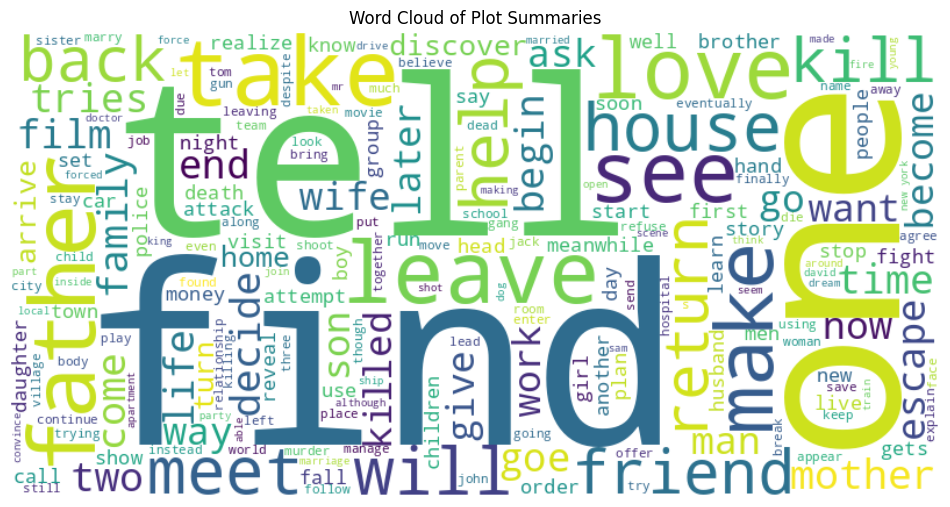

In [44]:
#Word Cloud of Plot Summaries - most frequent words
plt.figure(figsize=(12, 8))
text = ' '.join(df_1['plot_summary'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Plot Summaries')
plt.axis('off')
plt.show()


In [45]:
#Combine all plot summaries into a single string
all_summaries = ' '.join(plot_summaries['plot_summary'])

# Remove punctuation and convert to lowercase
all_summaries = re.sub(r'[^\w\s]', '', all_summaries).lower()

# Split the string into a list of words
words = all_summaries.split()

# Count the frequency of each word
word_counts = Counter(words)

# Print the top 100 most frequent words
print("Top 100 most frequent words in plot summaries:")
for word, count in word_counts.most_common(100):
    print(f"{word}: {count}")

Top 100 most frequent words in plot summaries:
the: 824593
to: 481284
and: 456584
a: 375962
of: 261456
is: 224417
in: 220042
his: 196680
he: 175766
her: 151147
with: 139374
that: 138745
him: 96819
for: 94965
by: 92468
she: 91446
as: 88939
on: 83116
they: 72219
but: 71754
who: 70731
at: 63911
from: 60770
an: 58037
has: 56620
their: 53606
it: 52051
are: 51047
when: 50004
after: 44666
out: 42701
into: 39403
up: 38356
them: 35704
be: 35194
was: 33462
one: 31230
not: 30694
then: 30273
which: 27394
while: 26502
this: 25694
about: 25630
back: 24468
have: 23896
where: 22461
all: 22344
will: 21825
two: 21757
film: 20272
tells: 19109
father: 18348
had: 18314
man: 18190
off: 17614
time: 17336
only: 17289
love: 17240
new: 17181
life: 17144
get: 17135
been: 17019
other: 16965
before: 16940
home: 16747
also: 16355
find: 16133
however: 16017
house: 15938
finds: 15733
later: 15599
family: 15546
being: 15422
so: 15265
over: 14533
goes: 14208
go: 14124
takes: 13932
mother: 13641
can: 13552
police: 13510

Well, we can see that most common words used in this are words like "the", "a", "is",etc. which don't give a lot of information. Let's try to remove these words.

In [46]:
# Download the stopwords corpus (if not already downloaded)
nltk.download('stopwords')

# Combine all plot summaries into a single string
all_summaries = ' '.join(plot_summaries['plot_summary'])

# Remove punctuation and convert to lowercase
all_summaries = re.sub(r'[^\w\s]', '', all_summaries).lower()

# Split the string into a list of words
words = all_summaries.split()

# Load the English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the list of words
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word (excluding stopwords)
word_counts = Counter(filtered_words)

# Print the top 50 most frequent words (excluding stopwords)
print("Top 50 most frequent words in plot summaries (excluding stopwords):")
for word, count in word_counts.most_common(100):
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 50 most frequent words in plot summaries (excluding stopwords):
one: 31230
back: 24468
two: 21757
film: 20272
tells: 19109
father: 18348
man: 18190
time: 17336
love: 17240
new: 17181
life: 17144
get: 17135
home: 16747
also: 16355
find: 16133
however: 16017
house: 15938
finds: 15733
later: 15599
family: 15546
goes: 14208
go: 14124
takes: 13932
mother: 13641
police: 13510
day: 13365
away: 13041
young: 12672
take: 12604
first: 12433
gets: 12214
tries: 12074
help: 12044
wife: 11811
night: 11454
son: 11083
story: 10597
begins: 10556
way: 10540
friends: 10499
death: 10368
becomes: 10332
friend: 10259
money: 10217
killed: 10161
next: 10038
make: 9986
comes: 9940
another: 9882
woman: 9829
years: 9800
decides: 9775
men: 9757
car: 9730
soon: 9636
daughter: 9399
leaves: 9316
leave: 9076
old: 9010
school: 8958
girl: 8826
see: 8804
kill: 8760
meanwhile: 8652
asks: 8587
named: 8440
finally: 8403
eventually: 8401
returns: 8242
three: 8192
meets: 8142
group: 8133
end: 8028
escape: 7987
room: 7881


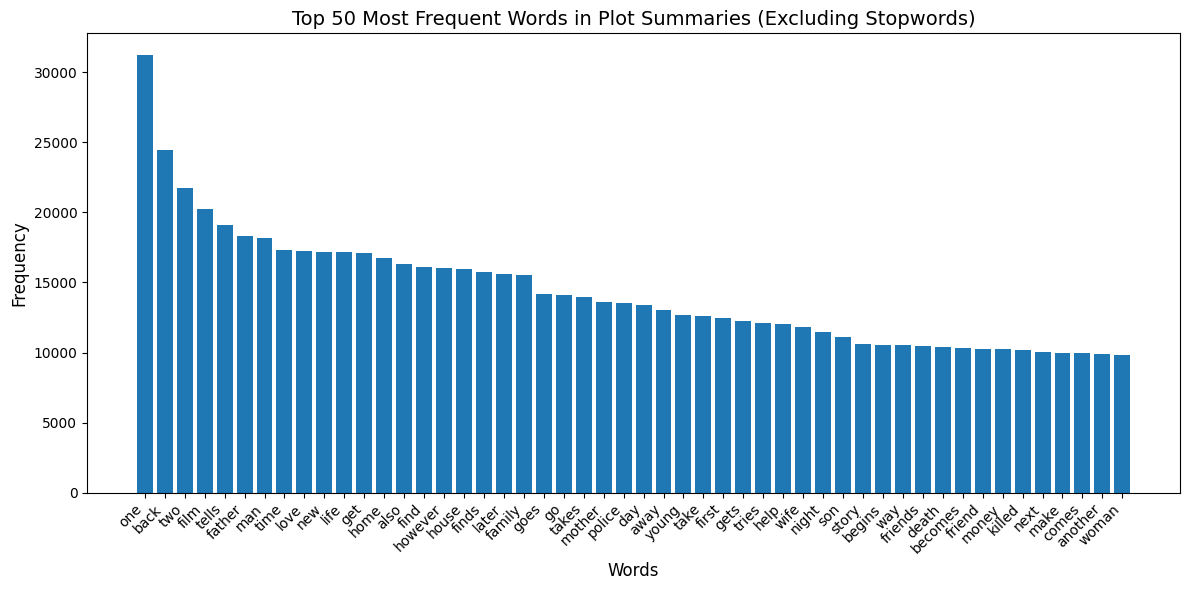

In [47]:
# Get the top 50 most frequent words (excluding stopwords)
top_words = word_counts.most_common(50)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
word_labels = [word for word, count in top_words]
word_counts = [count for word, count in top_words]
ax.bar(word_labels, word_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 50 Most Frequent Words in Plot Summaries (Excluding Stopwords)', fontsize=14)
plt.tight_layout()
plt.show()

The top 100 words in movie plot summaries provide insights into the common themes, characters, and actions found in these plots.

1. **Common Themes**:
   - Words like "love", "family", "life", "death", "friendship", and "money" suggest that many plot summaries revolve around universal themes and human experiences.

2. **Character Types**:
   - "Man", "woman", "father", "mother", "son", "daughter", "brother", "friend", and "police" indicate the presence of various character types central to many plots.

3. **Actions and Events**:
   - "Tells", "finds", "takes", "help", "goes", "tries", "begins", "comes", "decides", "kills", "meets", "escapes", "returns", "asks", "falls", "works", "arrives", "fights", "head", "dies", "leaves", "asks", "sees", "wants", "gives", and "killed" highlight common actions, decisions, and events that drive the plot forward.

4. **Settings and Locations**:
   - "Home", "house", "town", "city", and "room" suggest various settings where the events of the plot unfold.

5. **Conflict and Resolution**:
   - Words like "fight", "escape", "dead", "kill", and "fall" hint at the presence of conflicts, obstacles, and resolutions within the plots.

  Let's now do some basic visualization about the movie genres

## Movie Genres

### What are the top 20 movie genres by count?

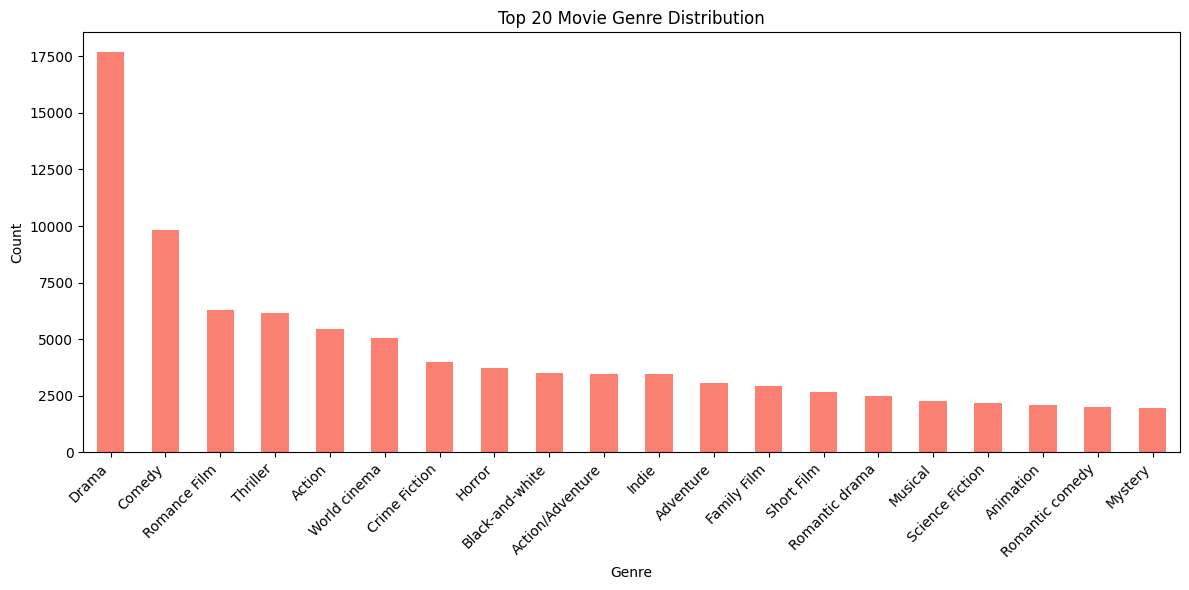

In [48]:
# Plotting Movie Genre Distribution for Top 10 genres
plt.figure(figsize=(12, 6))
top_n_genres = 20  # Number of top genres to display
genres_count = df_1['movie_genres'].explode().value_counts()
top_genres_count = genres_count.head(top_n_genres)
top_genres_count.plot(kind='bar', color='salmon')
plt.title(f'Top {top_n_genres} Movie Genre Distribution')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


We can see **drama** is the most common movie genre, followed by comedy and romance. Let's try to find the least popular movie genres.

In [49]:
# Find genres with only one movie
single_movie_genres = genres_count[genres_count == 1]

# Print genres with only one movie
print("Genres with only one movie:")
for genre, count in single_movie_genres.items():
    print(f"{genre}: {count}")


Genres with only one movie:
Political Documetary: 1
Silhouette animation: 1
Breakdance: 1
Conspiracy fiction: 1
C-Movie: 1
Psychological horror: 1
Neorealism: 1
Historical Documentaries: 1
New Queer Cinema: 1
Statutory rape: 1
Patriotic film: 1
Buddy Picture: 1
Beach Party film: 1
Linguistics: 1
War effort: 1
Ninja movie: 1
Chick flick: 1
Children's Issues: 1
Homoeroticism: 1


These are the least popular movie genres.

### What are the top 20 movie genres by revenue?



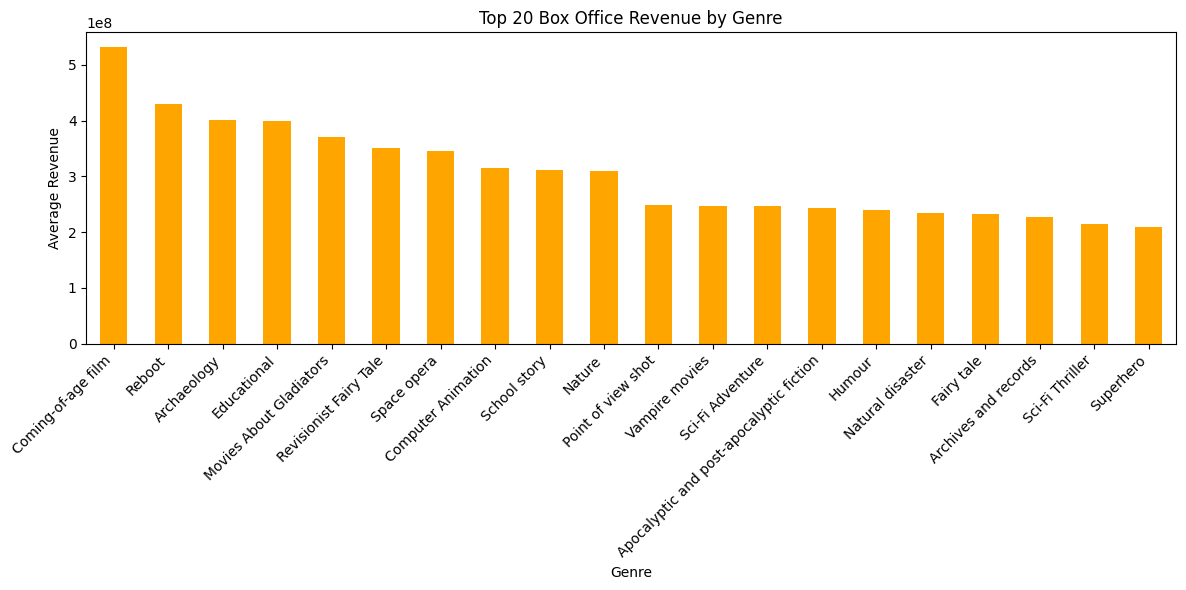

In [50]:
# Plotting Box Office Revenue by Genre for Top 10 genres
plt.figure(figsize=(12, 6))
top_n = 20  # Number of top genres to display
genre_revenue = box_office_revenue.explode('movie_genres').groupby('movie_genres')['movie_box_office_revenue'].mean()
top_genres = genre_revenue.sort_values(ascending=False).head(top_n)
top_genres.plot(kind='bar', color='orange')
plt.title(f'Top {top_n} Box Office Revenue by Genre')
plt.ylabel('Average Revenue')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


**Coming-of-age** films are the most revenue generating films.

Let's do same basic visualization about the movie countries now!

## Movie Country

### What are the top-20 countries by movie count?

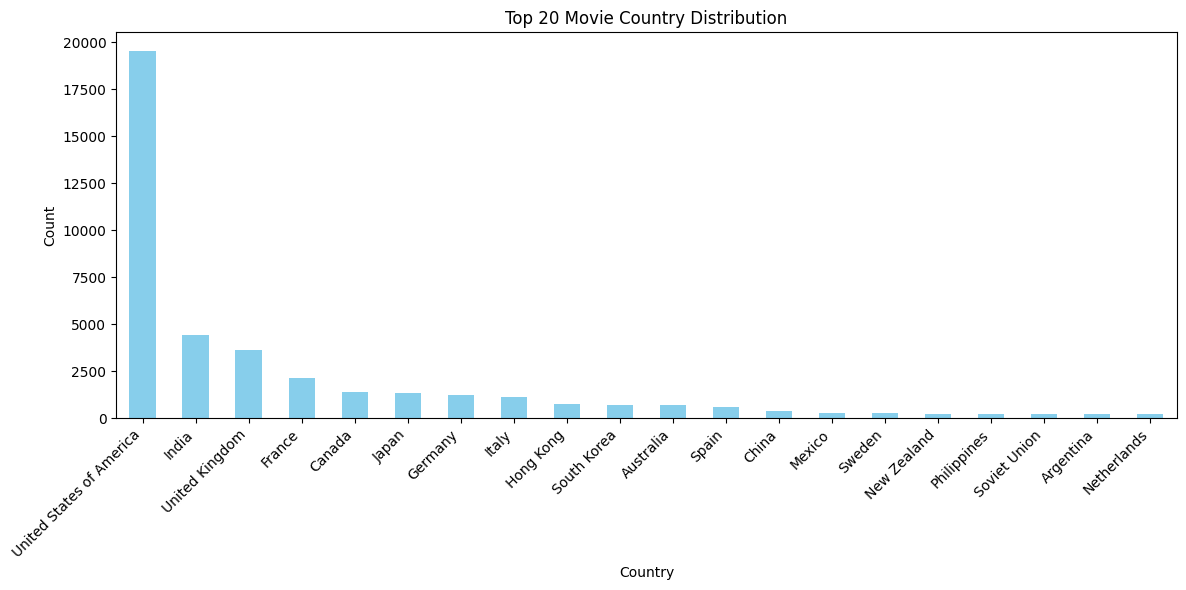

In [51]:
# Plotting Movie Country Distribution for Top 10 countries
plt.figure(figsize=(12, 6))
top_n_countries = 20  # Number of top countries to display
countries_count = df_1['movie_countries'].explode().value_counts()
top_countries = countries_count.head(top_n_countries)
top_countries.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n_countries} Movie Country Distribution')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


The **United States of America** makes the most movies followed by **India**  😀

### Top Countries by movie count vs Top countries by movie revenue

<Figure size 1200x600 with 0 Axes>

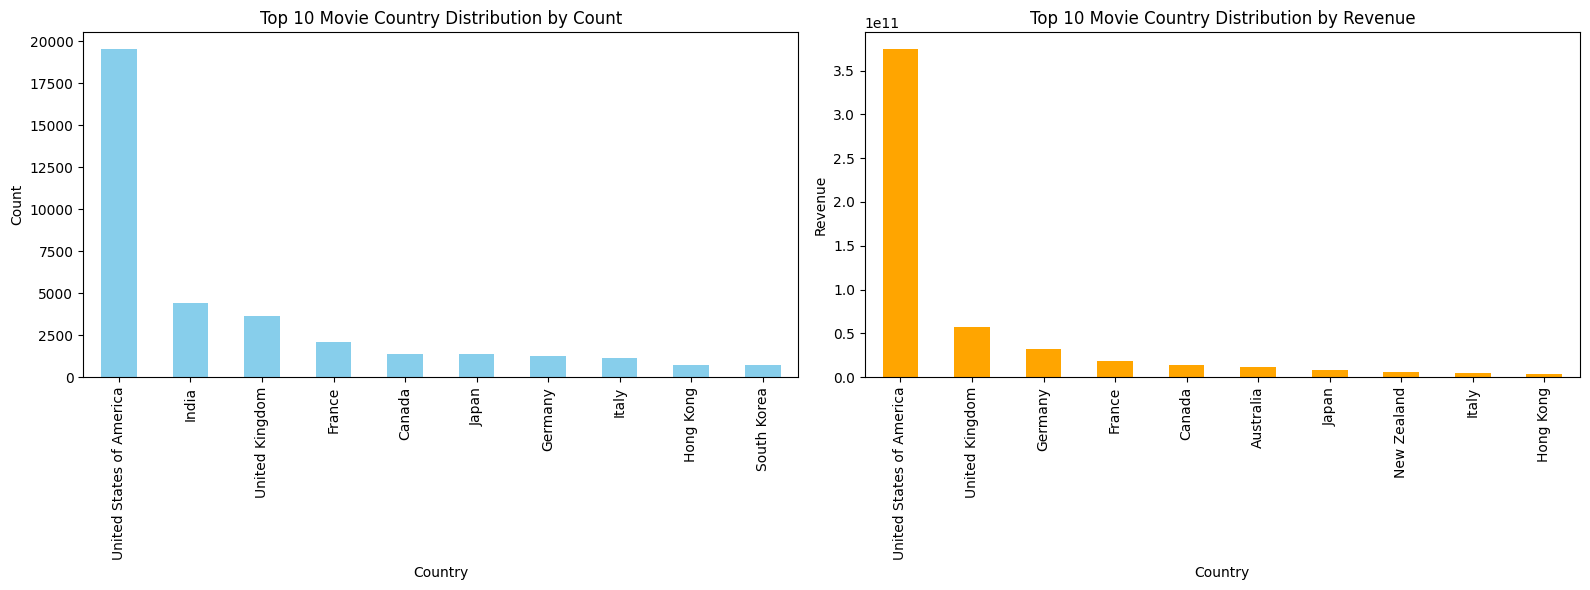

In [52]:
# Plotting Movie Country Distribution for Top 10 countries
plt.figure(figsize=(12, 6))
top_n_countries = 10  # Number of top countries to display

# Get the top countries by movie count
countries_count = df_1['movie_countries'].explode().value_counts()
top_countries_by_count = countries_count.head(top_n_countries)

# Get the top countries by revenue
country_revenue = box_office_revenue.explode('movie_countries').groupby('movie_countries')['movie_box_office_revenue'].sum()
top_countries_by_revenue = country_revenue.sort_values(ascending=False).head(top_n_countries)

# Create a subplot with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the top countries by movie count
top_countries_by_count.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title(f'Top {top_n_countries} Movie Country Distribution by Count')
ax1.set_ylabel('Count')
ax1.set_xlabel('Country')

# Plot the top countries by revenue
top_countries_by_revenue.plot(kind='bar', color='orange', ax=ax2)
ax2.set_title(f'Top {top_n_countries} Movie Country Distribution by Revenue')
ax2.set_ylabel('Revenue')
ax2.set_xlabel('Country')


plt.tight_layout()
plt.show()

A very interesting observation. The United States of America generates the highest revenue of movies in Box Office. But, India which produces the second most number of movies does not belong to the top 10 movie countries by revenue.

Most likely reason is the lack of revenue data for India since this field contained a lot of NaN values

Let's now do some basic visualization about movie languages

## Movie Language

### What are the top-20 movies by language?

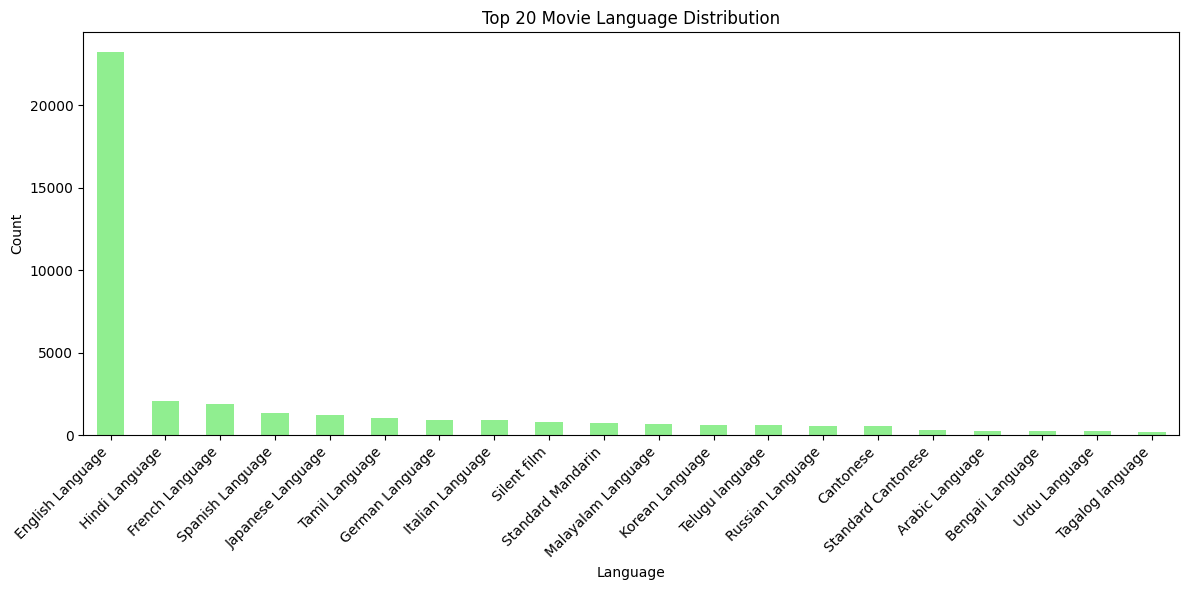

In [53]:
# Plotting Movie Language Distribution for Top 10 languages
plt.figure(figsize=(12, 6))
top_n_languages = 20  # Number of top languages to display
languages_count = df_1['movie_languages'].explode().value_counts()
top_languages = languages_count.head(top_n_languages)
top_languages.plot(kind='bar', color='lightgreen')
plt.title(f'Top {top_n_languages} Movie Language Distribution')
plt.ylabel('Count')
plt.xlabel('Language')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


### Top Movies by Langauge Count vs Top Movies by Language Revenue

<Figure size 1200x600 with 0 Axes>

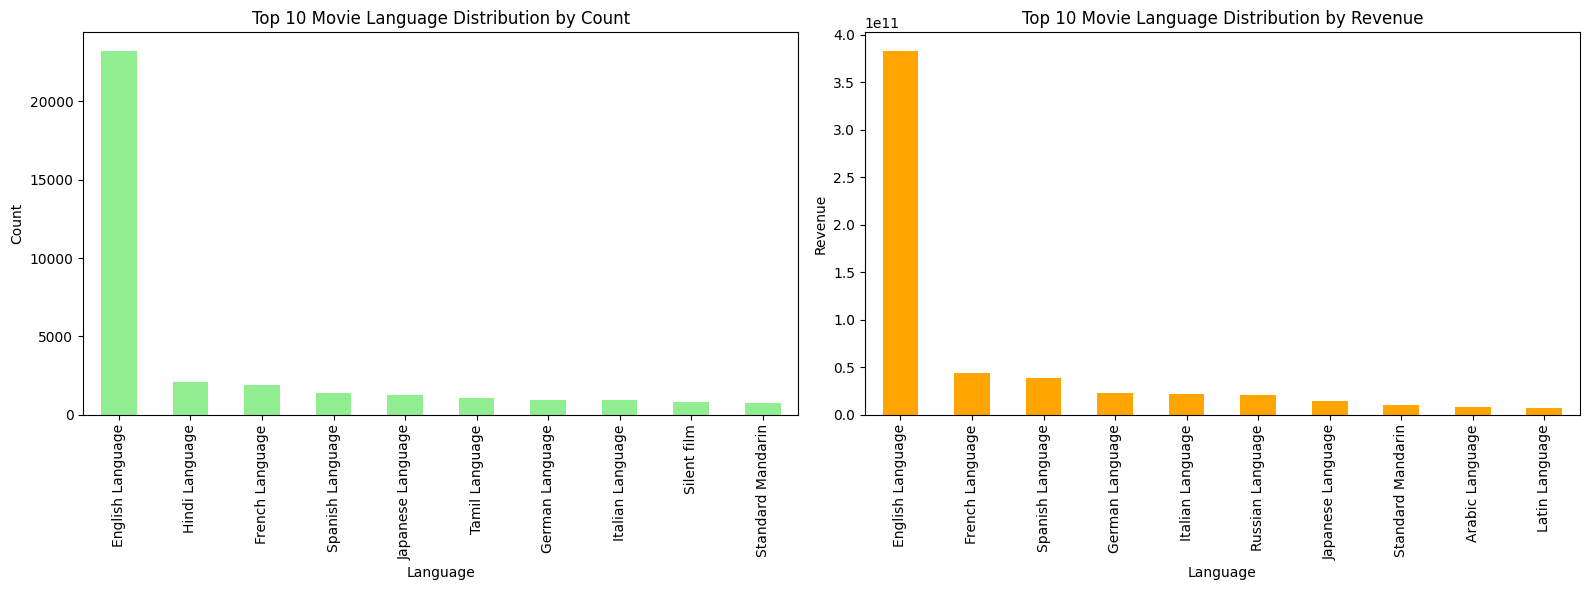

In [54]:
# Plotting Movie Language Distribution based on Revenue
plt.figure(figsize=(12, 6))
top_n_languages = 10  # Number of top languages to display

# Get the top languages by movie count
languages_count = df_1['movie_languages'].explode().value_counts()
top_languages_by_count = languages_count.head(top_n_languages)

# Get the top languages by revenue
language_revenue = box_office_revenue.explode('movie_languages').groupby('movie_languages')['movie_box_office_revenue'].sum()
top_languages_by_revenue = language_revenue.sort_values(ascending=False).head(top_n_languages)

# Create a subplot with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the top languages by movie count
top_languages_by_count.plot(kind='bar', color='lightgreen', ax=ax1)
ax1.set_title(f'Top {top_n_languages} Movie Language Distribution by Count')
ax1.set_ylabel('Count')
ax1.set_xlabel('Language')


# Plot the top languages by revenue
top_languages_by_revenue.plot(kind='bar', color='orange', ax=ax2)
ax2.set_title(f'Top {top_n_languages} Movie Language Distribution by Revenue')
ax2.set_ylabel('Revenue')
ax2.set_xlabel('Language')


plt.tight_layout()
plt.show()

Again, India is not in top 10 countries by movie revenue even though Hindi is the second most used language in movies.

Let's do some basic plotting about Box Of Revenue now!

## Box-Office Revenue

### Trends in total movie revenue over the years.

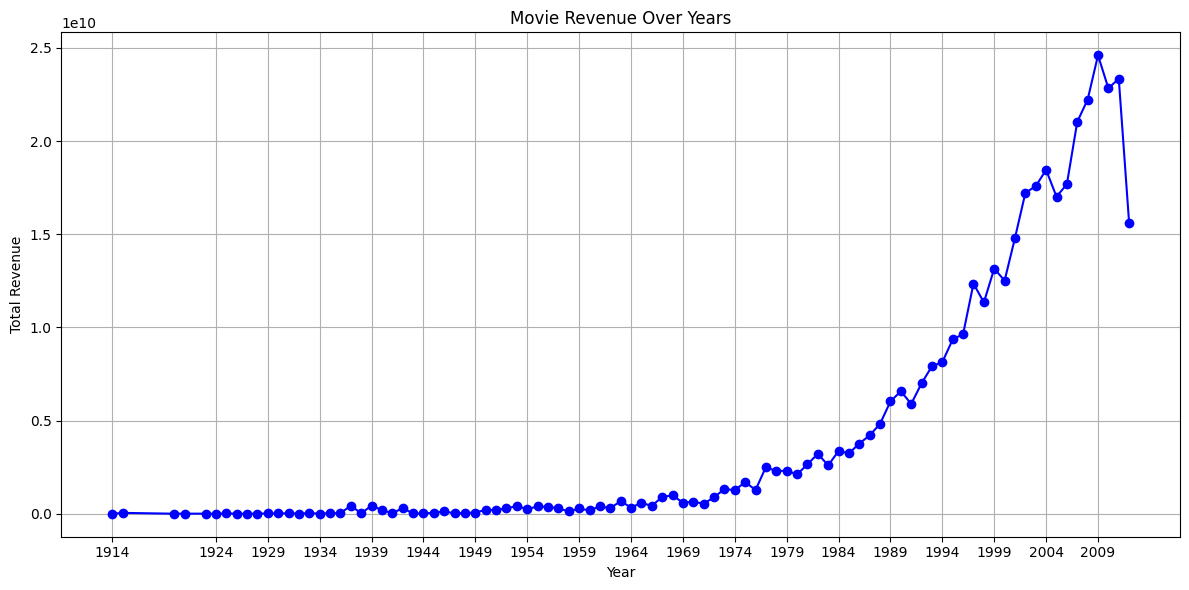

In [55]:
# Extracting year from movie release date
box_office_revenue['release_year'] = box_office_revenue['movie_release_date'].dt.year

# Grouping data by year and summing up the revenue
revenue_by_year = box_office_revenue.groupby('release_year')['movie_box_office_revenue'].sum()

# Plotting movie revenue over years
plt.figure(figsize=(12, 6))
revenue_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Movie Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)

# Adjusting x-ticks to display every 5 years
years = revenue_by_year.index
plt.xticks(years[::5])

plt.tight_layout()
plt.show()

There's a steep fall after 2015 since limited data is available beyond that.

### Movie Runtime vs Release Year

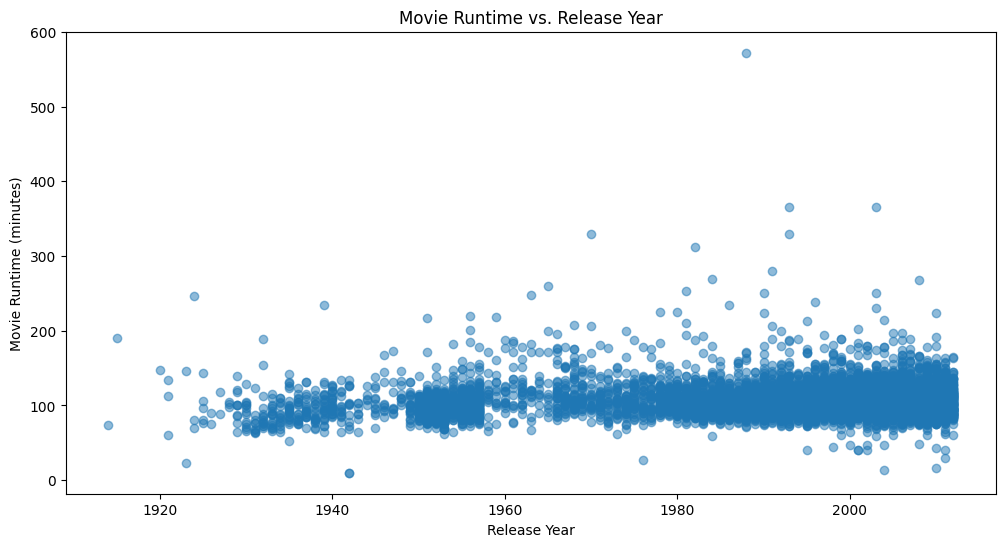

In [56]:
plt.figure(figsize=(12, 6))
plt.scatter(box_office_revenue["movie_release_date"].dt.year, box_office_revenue["movie_runtime"], alpha=0.5)
plt.title("Movie Runtime vs. Release Year")
plt.xlabel("Release Year")
plt.ylabel("Movie Runtime (minutes)")
plt.show()

## Actor Age

### Histogram of Actor Age

In [57]:
character_metadata["actor_age"].min()

-7896.0

Actor age has some anamolous values. Let's remove them

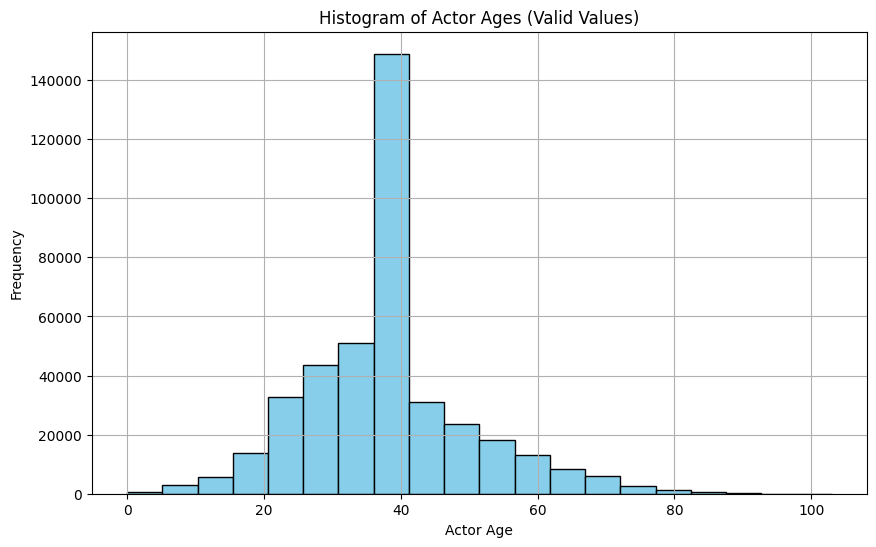

In [58]:
# Filter out values less than 0
valid_actor_age = character_metadata["actor_age"][character_metadata["actor_age"] >= 0]

# Plot histogram of valid actor ages
plt.figure(figsize=(10, 6))
plt.hist(valid_actor_age, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Actor Ages (Valid Values)')
plt.xlabel('Actor Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### How does the genre in which the actor acts vary over age?

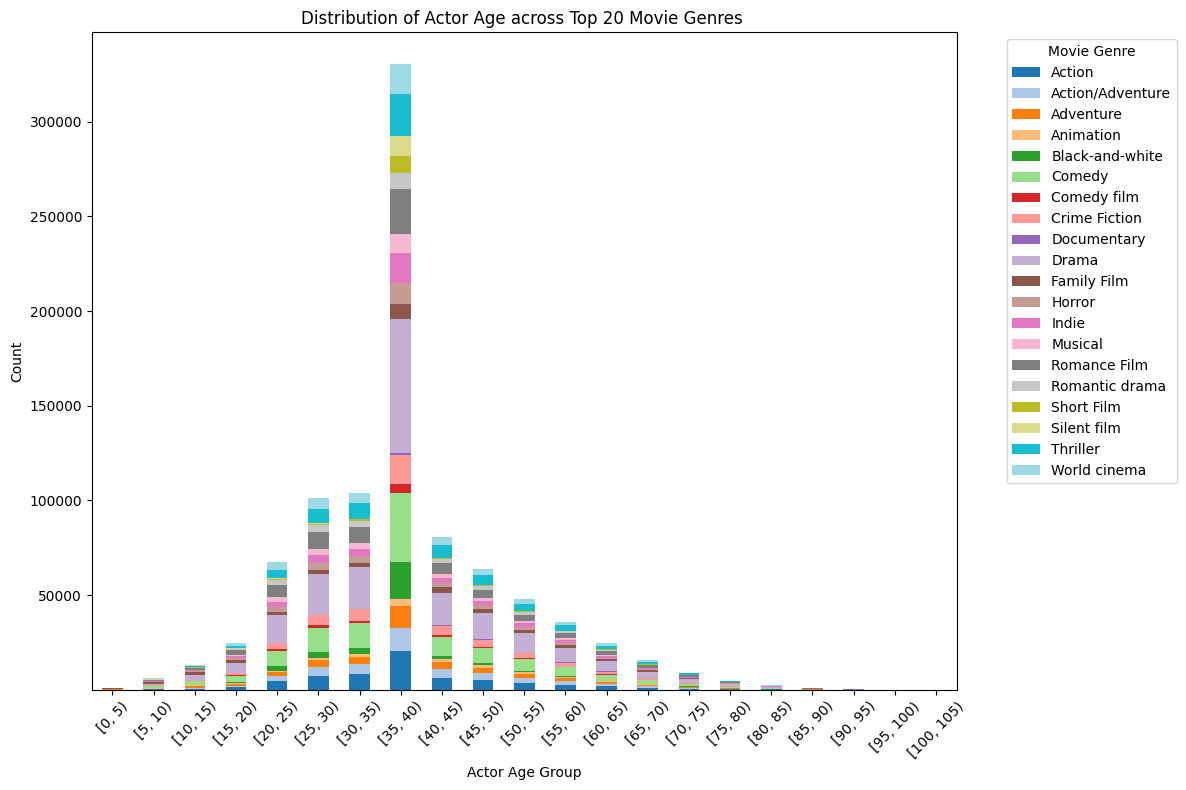

In [59]:
# Explode the movie genres column to have one row per genre per movie
exploded_genres = movie_metadata.explode('movie_genres')

# Calculate the frequency of each movie genre
genre_frequency = exploded_genres['movie_genres'].value_counts()

# Select the top 20 movie genres by frequency
top_20_genres = genre_frequency.head(20).index

# Filter out only the rows with the top 20 movie genres
top_20_data = exploded_genres[exploded_genres['movie_genres'].isin(top_20_genres)]

# Merge character metadata and movie metadata on the field wiki_movie_id
merged_data = pd.merge(character_metadata, top_20_data, on='wiki_movie_id', how='inner')

# Convert actor ages to float
merged_data['actor_age'] = merged_data['actor_age'].astype(float)

# Convert movie genres to strings
merged_data['movie_genres'] = merged_data['movie_genres'].astype(str)

# Filter out invalid actor ages (less than 0)
merged_data = merged_data[merged_data["actor_age"] >= 0]

# Define age bins
age_bins = range(0, int(merged_data['actor_age'].max()) + 6, 5)

# Create age groups
merged_data['age_group'] = pd.cut(merged_data['actor_age'], bins=age_bins, right=False)

# Count the number of occurrences of each genre for each age group
genre_age_counts = merged_data.groupby(['age_group', 'movie_genres']).size().unstack(fill_value=0)

# Plot bar chart for the top 20 movie genres
plt.figure(figsize=(12, 8))
genre_age_counts.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribution of Actor Age across Top 20 Movie Genres ')
plt.xlabel('Actor Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Movie Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This graph shows the relationship between age of actors and the movie genres they start in.

### Most Common Character Names

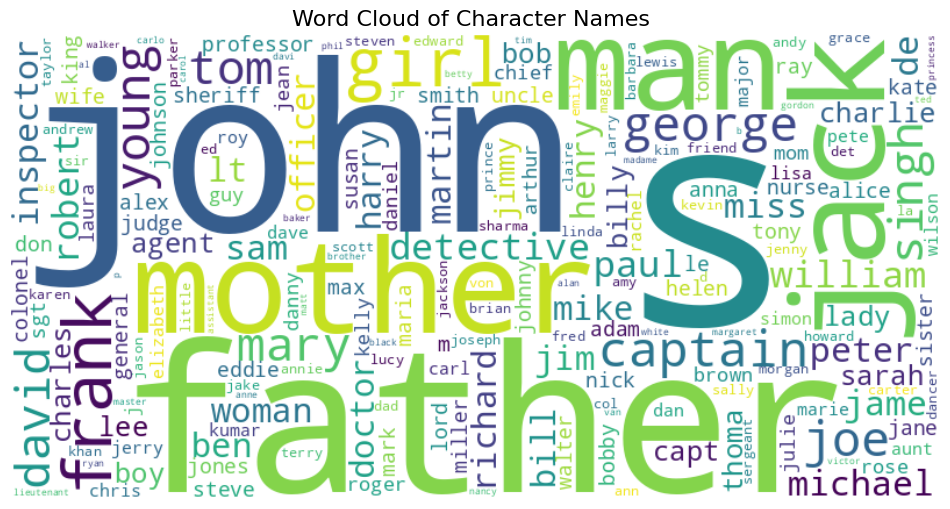

In [60]:
import re

# Define a function to remove titles from character names
def remove_titles(name):
    return re.sub(r'^(Mr\.|Dr\.|Mrs\.|Miss|mr|dr|Mr|Dr|Ms\.|Sir|Lord|Lady)\s*', '', name)

# Get the character names from the DataFrame, excluding 'unknown' and removing titles
character_names = character_metadata[character_metadata['character_name'].str.lower() != 'unknown']['character_name'].apply(remove_titles).str.lower()

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(character_names))

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Character Names ', fontsize=16)
plt.show()

Good'ol John and Jack and William and George and Tom  occur frequently in this word cloud.

# Bechdel Test

**Credits:** https://github.com/epfl-ada/ada-2023-project-sugarpandaddies5

Please refer to README.md for more information about the Bechdel Test.

## Dataset Loading

In [61]:
#Loading the bechdel test dataset
bechdel_file_path = '/content/drive/My Drive/Datasets/Bechdel_get_all.json'

with open(bechdel_file_path, 'r') as file:
    data = json.load(file)

# Convert JSON to DataFrame
bechdel = pd.DataFrame(data)

bechdel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   imdbid  10136 non-null  object
 1   year    10136 non-null  int64 
 2   rating  10136 non-null  int64 
 3   id      10136 non-null  int64 
 4   title   10136 non-null  object
dtypes: int64(3), object(2)
memory usage: 396.1+ KB


In [62]:
#dataframe of characters and their features by movies from CMU Movie Summary Corpus
column_names = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]

character_metadata = pd.read_csv('/content/drive/My Drive/Datasets/MovieSummaries/character.metadata.tsv', delimiter='\t', quotechar='"', names=column_names, header=0)
character_metadata.head(3)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc


In [63]:
#Reloading the movie_metadata for bechdel pre-processing (some important data was lost in the earlier pre-processi we also need the year and release data in a different format)
movie_metadata = pd.read_csv('/content/drive/My Drive/Datasets/movie.metadata.tsv', names = ['Wikipedia movie ID','Freebase movie ID','Movie name','Movie release date',
                                                   'Movie box office revenue','Movie runtime','Movie languages (Freebase ID:name tuples)',
                                                   'Movie countries (Freebase ID:name tuples)','Movie genres (Freebase ID:name tuples)'], sep='\t')
movie_metadata['Movie release date']=pd.to_datetime(movie_metadata['Movie release date'], format='%Y-%m-%d', errors='coerce')
movie_metadata['year'] = movie_metadata['Movie release date'].dt.year



In [64]:
#extracting movie language from dictionary
movie_metadata["Movie languages (Freebase ID:name tuples)"] = movie_metadata["Movie languages (Freebase ID:name tuples)"].apply(lambda x: eval(x))
movie_metadata["Movie languages (Freebase ID:name tuples)"] = movie_metadata["Movie languages (Freebase ID:name tuples)"].apply(lambda x: list(x.values()))

#extracting movie genres from dictionary
movie_metadata["Movie genres (Freebase ID:name tuples)"] = movie_metadata["Movie genres (Freebase ID:name tuples)"].apply(lambda x: eval(x))
movie_metadata["Movie genres (Freebase ID:name tuples)"] = movie_metadata["Movie genres (Freebase ID:name tuples)"].apply(lambda x: list(x.values()))

#extracting movie countries from dictionary
movie_metadata["Movie countries (Freebase ID:name tuples)"] = movie_metadata["Movie countries (Freebase ID:name tuples)"].apply(lambda x: eval(x))
movie_metadata["Movie countries (Freebase ID:name tuples)"] = movie_metadata["Movie countries (Freebase ID:name tuples)"].apply(lambda x: list(x.values()))

## Bechdel Test Plotting


### Numbe of movies in the CMU dataset vs Bechdel Test Dataset

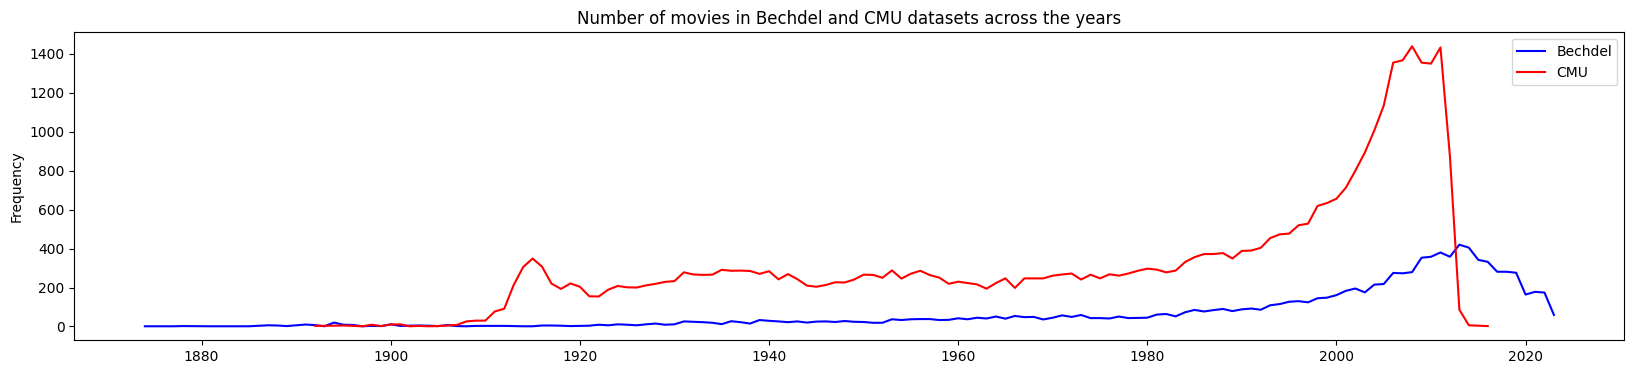

In [65]:
plt.figure(figsize=(20,4))
plt.plot(bechdel.groupby('year').count().index, bechdel.groupby('year').count()['id'], color='blue', label='Bechdel')
plt.plot(movie_metadata.groupby('year').count().index, movie_metadata.groupby('year').count()['Movie name'], color='red', label='CMU')
plt.ylabel('Frequency')
plt.title('Number of movies in Bechdel and CMU datasets across the years')
plt.legend()

The CMU movie dataset has many more movies as compared to the Bechdel dataset. The CMU movie corpus only includes data till the year 2016

### Merging the two dataframes

**Note:** Here we are using a dataset provided by the author after letting it webscrape and combine the movies in the Bechdel dataset with their wikipedia IDs. According to the author this took quite some time, so I am directly using the dataset provided by the author.

In [66]:
# Loading the bechdel dataset with wikipedia IDs
bechdel = pd.read_csv('/content/drive/My Drive/Datasets/df_bech_with_wikiID.csv')
bechdel.head()

,Unnamed: 0,imdbid,year,rating,id,title,WikiID
0,0,3155794.0,1874,0,9602,Passage de Venus,47863608.0
1,1,14495706.0,1877,0,9804,La Rosace Magique,385718.0
2,2,2221420.0,1878,0,9603,Sallie Gardner at a Gallop,26044155.0
3,3,12592084.0,1878,0,9806,Le singe musicien,385718.0
4,4,7816420.0,1881,0,9816,Athlete Swinging a Pick,60115.0


In [67]:
#Merge the two dataframes on Wikipedia IDs
merged_df = pd.merge(bechdel, movie_metadata, left_on='WikiID', right_on='Wikipedia movie ID', how='inner')
print('The merged Bechdel movie dataset has', len(merged_df), 'movies')
print(100*round((len(merged_df)/len(bechdel)),2),'% of Bechdel movies are in the merged dataset')

The merged Bechdel movie dataset has 5816 movies
56.99999999999999 % of Bechdel movies are in the merged dataset


There is a 60% match between the two datasets which is a good enough number. Let's now observe the merged dataframe a little

In [68]:
merged_df.head()

,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y
0,2,2221420.0,1878,0,9603,Sallie Gardner at a Gallop,26044155.0,26044155,/m/0b6f62m,Sallie Gardner at a Gallop,NaT,NaN,0.05,[Silent film],[United States of America],"[Short Film, Silent film]",NaN
1,13,392728.0,1888,0,8040,Roundhay Garden Scene,1082508.0,1082508,/m/044ggd,Roundhay Garden Scene,NaT,NaN,0.03,[Silent film],[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",NaN
2,18,466876.0,1889,0,9619,"Leisurely Pedestrians, Open Topped Buses and H...",12170539.0,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",NaT,NaN,NaN,"[Silent film, English Language]",[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",NaN
3,19,2116898.0,1889,0,9945,Hyde Park Corner,12170539.0,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",NaT,NaN,NaN,"[Silent film, English Language]",[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",NaN
4,20,361921.0,1890,0,9617,"Monkeyshines, No. 1",6431996.0,6431996,/m/0g53t3,"Monkeyshines, No. 1",NaT,NaN,NaN,[Silent film],[United States of America],[Silent film],NaN


## Bechdel Dataset Ratings Basic Visualization

In [69]:
# Group the data by year and Bechdel test rating, and count the occurrences
rating_counts = merged_df.groupby(['year_x', 'rating']).size().reset_index(name='count')

# Reshape the data to have one row per year with columns for each rating
rating_counts = rating_counts.pivot_table(index='year_x', columns='rating', values='count', fill_value=0)

#printing the pivot table
print(rating_counts)

rating  0  1  2  3
year_x            
1878    1  0  0  0
1888    1  0  0  0
1889    2  0  0  0
1890    3  0  0  0
1891    3  0  0  0
...    .. .. .. ..
2018    0  1  0  0
2019    0  0  0  1
2020    0  0  0  1
2021    0  0  0  2
2022    0  0  1  0

[129 rows x 4 columns]


Let's plot this information to visualize it better

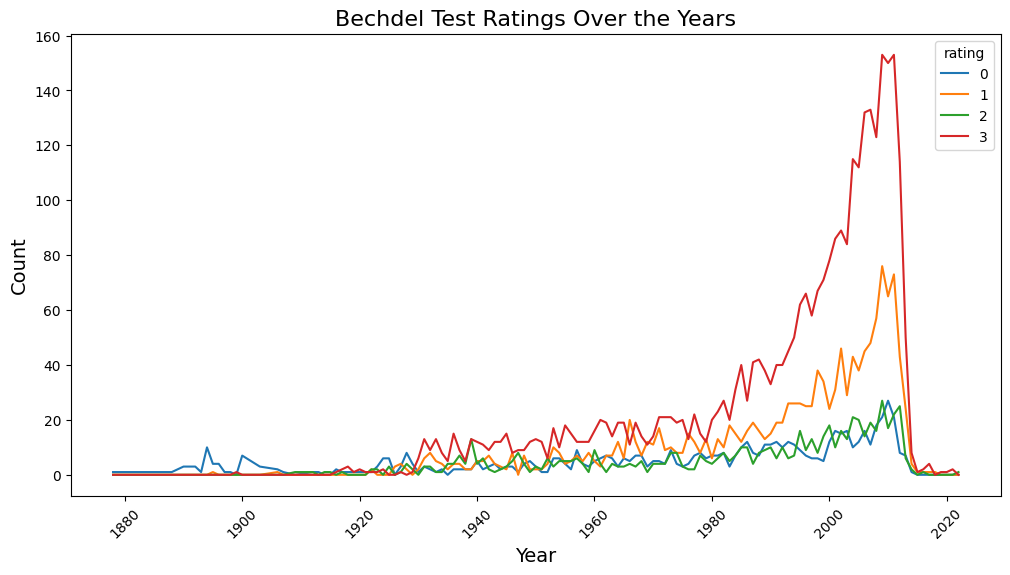

In [70]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
rating_counts.plot(kind='line', ax=ax)

# Set plot title and axis labels
ax.set_title('Bechdel Test Ratings Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

The Bechdel dataset has 4 kinds of ratings ranging from 0 to 3. This plot shows a visualization of the same.

According to the dataset, a movie passes the Bechdel test if it has a rating of 3. Anything less than 3 leads to a failure. So, visualizing the number of movies passing and failing the bechdel test.

### Bechdel Test: Pass vs Fail

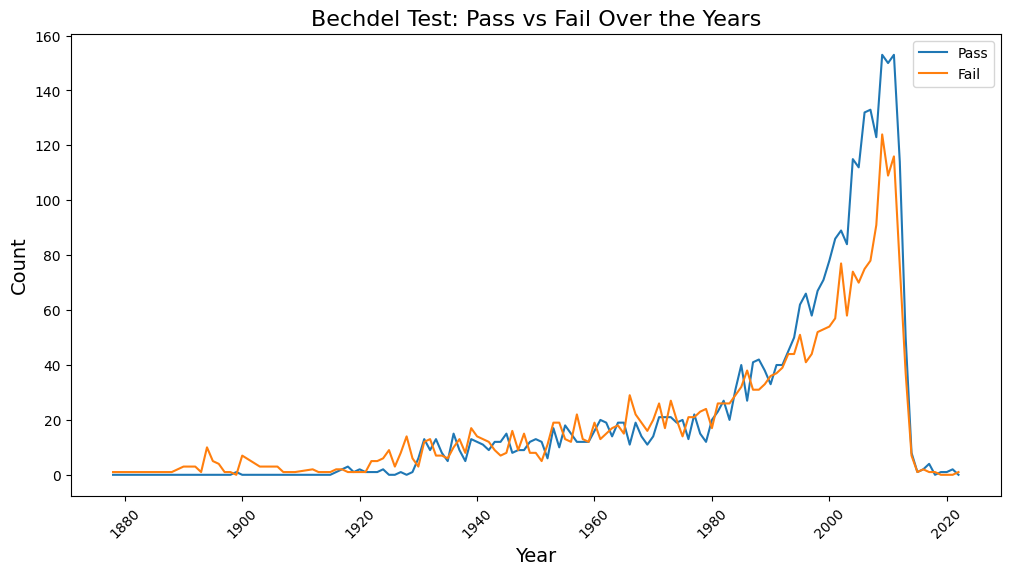

In [71]:
# Create a new DataFrame with 'Pass' and 'Fail' columns
pass_fail_counts = rating_counts[3].rename('Pass').to_frame()
pass_fail_counts['Fail'] = rating_counts.drop(3, axis=1).sum(axis=1)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
pass_fail_counts.plot(kind='line', ax=ax)

# Set plot title and axis labels
ax.set_title('Bechdel Test: Pass vs Fail Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

Now, let's display the proportion of bechdel test ratings across the top-20 genres

### Proportion of Bechdel Test Rating across different genres

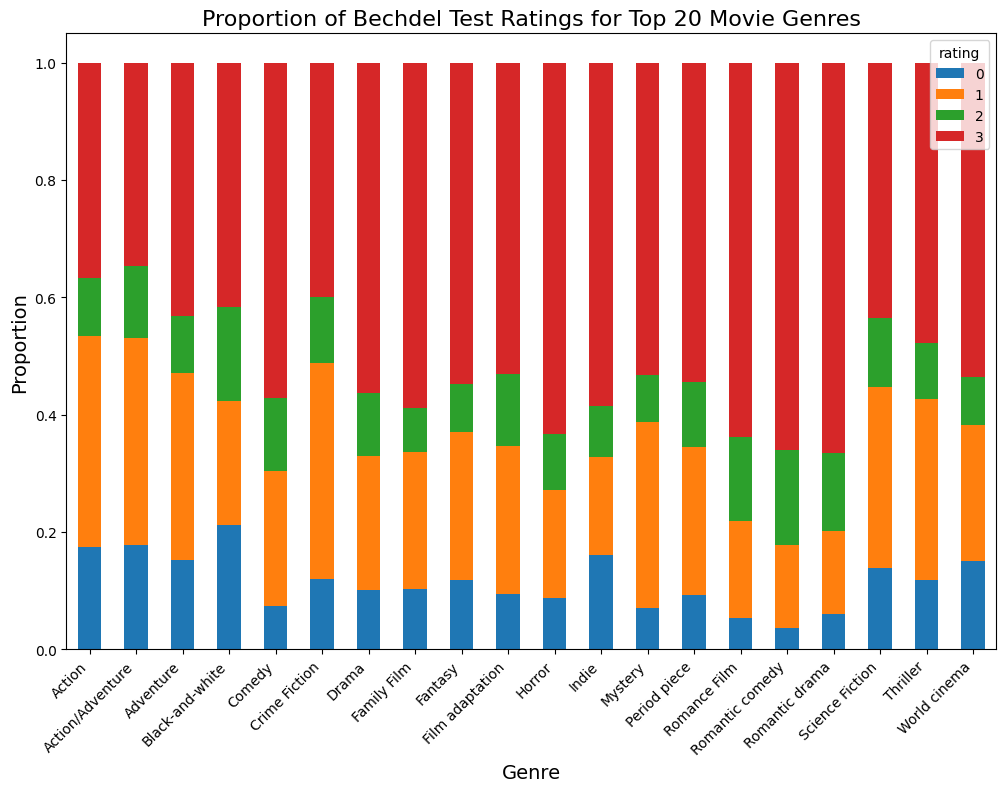

In [72]:
# Get the top 20 genres
all_genres = [genre for movie_genres in merged_df['Movie genres (Freebase ID:name tuples)'] for genre in movie_genres]
top_genres = Counter(all_genres).most_common(20)
top_genres = [genre for genre, count in top_genres]

# Filter the DataFrame to include only the top 20 genres
genre_data = merged_df[merged_df['Movie genres (Freebase ID:name tuples)'].apply(lambda x: any(genre in top_genres for genre in x))]

# Explode the 'Movie genres (Freebase ID:name tuples)' column
genre_data = genre_data.assign(genres=genre_data['Movie genres (Freebase ID:name tuples)'].apply(lambda x: [genre for genre in x])).explode('genres')

# Group by genre and Bechdel rating, and calculate the proportions
genre_rating_counts = genre_data.groupby(['genres', 'rating']).size().reset_index(name='count')
genre_rating_counts = genre_rating_counts.pivot_table(index='genres', columns='rating', values='count', aggfunc='sum', fill_value=0)
genre_rating_counts = genre_rating_counts.div(genre_rating_counts.sum(axis=1), axis=0)

# Filter the DataFrame to include only the top 20 genres
genre_rating_counts = genre_rating_counts.loc[genre_rating_counts.index.isin(top_genres)]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
genre_rating_counts.plot(kind='bar', stacked=True, ax=ax)

# Set plot title and axis labels
ax.set_title('Proportion of Bechdel Test Ratings for Top 20 Movie Genres', fontsize=16)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

This graph displays some interesting observations.

###*Q.* Is there a correlation between the number of female actors starring in a movie vs. whether the movie will pass the Bechdel test or not?



Merging the character metadata to the dataframe as well

In [73]:
#merge to the main dataframe to have actors and actress (names anf gender) for each movie
df = merged_df
df_characters_merged = pd.merge(df, character_metadata[['Wikipedia movie ID', 'Actor name', 'Actor gender']],
                                on=['Wikipedia movie ID'],
                                how='right')

#Drop characters associtated to movies we don't know
df_characters_merged.dropna(subset=['title'], inplace=True)
df_characters_merged = df_characters_merged.drop_duplicates(subset=['Wikipedia movie ID', 'Actor name'])

#instead of ranking for Bechdel test we will only see if the movie pass the test or not
df_characters_merged['Bechdel pass'] = np.where(df_characters_merged['rating'] == 3, 1, 0)

In [74]:
df_characters_merged.shape

(71013, 20)

Let's  now extract unique genders from our database

In [75]:
unique_genders = df_characters_merged['Actor gender'].unique()
print(unique_genders)

na_proportion = df_characters_merged['Actor gender'].isna().mean()
print("Proportion of missing values ​​in the 'gender' column:", na_proportion)

['F' 'M' nan]
Proportion of missing values ​​in the 'gender' column: 0.07759142692183121


There are some null values in the dataframe. Let's remove them and the gender value to a new column in our dataframe

In [76]:
df_characters_merged.dropna(subset=['Actor gender'], inplace=True)
unique_genders = df_characters_merged['Actor gender'].unique()
print(unique_genders)

['F' 'M']


Let's calculate some gender related statistics and add them to our dataframe

In [77]:
# Group by 'Wikipedia movie ID' and 'Actor gender' to count occurrences
gender_counts = df_characters_merged.groupby(['Wikipedia movie ID', 'Actor gender']).size().unstack(fill_value=0)

# Calculate the proportion of female and male actors for each movie
gender_proportion = gender_counts.div(gender_counts.sum(axis=1), axis=0).reset_index()
gender_proportion.columns = ['Wikipedia movie ID', 'female_actor_proportion', 'male_actor_proportion']

# Merge the proportion columns to the original dataframe
df_characters_merged = df_characters_merged.merge(gender_proportion, on='Wikipedia movie ID', how='left')

# Group by 'Wikipedia movie ID', 'Bechdel pass', and 'Actor gender' to count occurrences
gender_counts2 = df_characters_merged.groupby(['Wikipedia movie ID', 'Bechdel pass', 'Actor gender']).size().unstack(fill_value=0)
gender_counts2.columns = ['female_actresses', 'male_actors']

# Merge the calculated counts back to the original DataFrame
df_characters_merged = pd.merge(df_characters_merged, gender_counts2.reset_index(), on=['Wikipedia movie ID', 'Bechdel pass'], how='left')


In [78]:
df_characters_merged.head(3)

,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,...,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y,Actor name,Actor gender,Bechdel pass,female_actor_proportion,male_actor_proportion,female_actresses,male_actors
0,3984.0,228333.0,2001.0,3.0,333.0,Ghosts of Mars,975900.0,975900,/m/03vyhn,Ghosts of Mars,...,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,Natasha Henstridge,F,1,0.3125,0.6875,5,11
1,3984.0,228333.0,2001.0,3.0,333.0,Ghosts of Mars,975900.0,975900,/m/03vyhn,Ghosts of Mars,...,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,Ice Cube,M,1,0.3125,0.6875,5,11
2,3984.0,228333.0,2001.0,3.0,333.0,Ghosts of Mars,975900.0,975900,/m/03vyhn,Ghosts of Mars,...,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,Jason Statham,M,1,0.3125,0.6875,5,11


In [79]:
df_characters_merged_bymovie = df_characters_merged.groupby('Wikipedia movie ID').first().reset_index()

In [80]:
df_characters_merged_bymovie.head(3)

,Wikipedia movie ID,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Freebase movie ID,Movie name,...,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y,Actor name,Actor gender,Bechdel pass,female_actor_proportion,male_actor_proportion,female_actresses,male_actors
0,330,3427.0,115462.0,1997.0,3.0,1794.0,Actrius,330.0,/m/0ktn59,Actrius,...,[Spain],"[Drama, Comedy-drama]",NaN,Rosa Maria Sardà,F,1,1.000000,0.000000,4,0
1,3217,2829.0,106308.0,1992.0,2.0,1276.0,Army of Darkness,3217.0,/m/014hr,Army of Darkness,...,[United States of America],"[Cult, Horror, Stop motion, Costume drama, Act...",1992.0,Ted Raimi,M,0,0.300000,0.700000,3,7
2,3333,138.0,4972.0,1915.0,2.0,1258.0,"Birth of a Nation, The",3333.0,/m/0151l,The Birth of a Nation,...,[United States of America],"[Silent film, Indie, Costume drama, Epic, Blac...",NaN,Lillian Gish,F,0,0.428571,0.571429,6,8


Let's find the ratio of movies with less that 2 female characters that pass the Bechdel Test.

In [81]:
df_characters_merged_bymovie_missing = df_characters_merged_bymovie[(df_characters_merged_bymovie['Bechdel pass'] == 1) & (df_characters_merged_bymovie['female_actresses'] < 2)]
ratio = len(df_characters_merged_bymovie_missing) / len(df_characters_merged_bymovie)
print("Ratio of lengths:", ratio)

Ratio of lengths: 0.0448638063022966


Now we create a box plot visualizing the distribution of the average proportion of female actors across different Bechdel test results. Each box in the plot represents the interquartile range (IQR) of the data, with the horizontal line inside the box indicating the median value. The whiskers extend to show the rest of the distribution, excluding outliers.

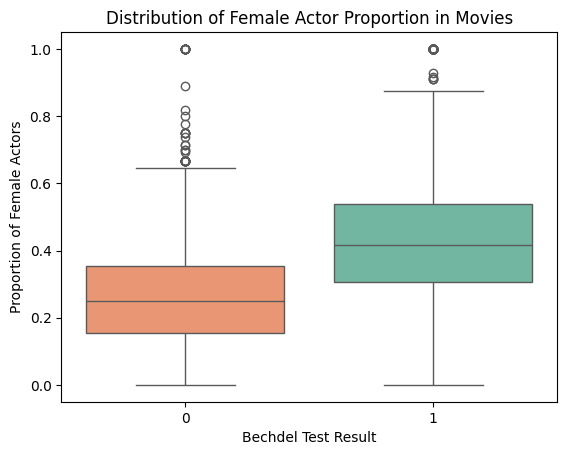

In [82]:
# Calculate the mean of 'female_actor_proportion' for each group
grouped_data = df_characters_merged.groupby(['Wikipedia movie ID', 'Bechdel pass'])['female_actor_proportion'].mean().reset_index()

# Set color palette
palette = {'1': '#66c2a5', '0': '#fc8d62'}

# Create a box plot with custom colors
sns.boxplot(x='Bechdel pass', y='female_actor_proportion', data=grouped_data, palette=palette)

# Set labels and title
plt.xlabel('Bechdel Test Result')
plt.ylabel('Proportion of Female Actors')
plt.title('Distribution of Female Actor Proportion in Movies')

# Show plot
plt.show()


In [83]:
grouped_data.head(3)

,Wikipedia movie ID,Bechdel pass,female_actor_proportion
0,330,1,1.000000
1,3217,0,0.300000
2,3333,0,0.428571


In [84]:
# Filter the DataFrame where 'female_actresses' is equal to 2
filtered_data = df_characters_merged_bymovie[df_characters_merged_bymovie['female_actresses'] == 2]
filtered_data2 = df_characters_merged_bymovie[df_characters_merged_bymovie['female_actresses'] > 2]

# Calculate the mean of 'female_actor_proportion' for each group
filtered_data_pass_bechdel = filtered_data[filtered_data['Bechdel pass'] == 1]
proportion_pass_bechdel = len(filtered_data_pass_bechdel) / len(filtered_data)

filtered_data_pass_bechdel2 = filtered_data2[filtered_data2['Bechdel pass'] == 1]
proportion_pass_bechdel2 = len(filtered_data_pass_bechdel2) / len(filtered_data2)

print("Proportion of movies passing the Bechdel test among female_actresses == 2:", proportion_pass_bechdel)
print("Proportion of movies passing the Bechdel test among female_actresses > 2:", proportion_pass_bechdel2)

Proportion of movies passing the Bechdel test among female_actresses == 2: 0.4221267454350161
Proportion of movies passing the Bechdel test among female_actresses > 2: 0.6491847826086956


In [85]:
# Filter the DataFrame where 'female_actresses' is equal to 2 and Bechdel test is passed
filtered_data_pass_bechdel_2_female = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2) & (df_characters_merged_bymovie['Bechdel pass'] == 1)]
filtered_data_fail_bechdel_2_female = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2) & (df_characters_merged_bymovie['Bechdel pass'] == 0)]

# Calculate the proportion
proportion_pass_bechdel_2_female = len(filtered_data_pass_bechdel_2_female) / len(df_characters_merged_bymovie[df_characters_merged_bymovie['Bechdel pass'] == 1])
proportion_fail_bechdel_2_female = len(filtered_data_fail_bechdel_2_female) / len(df_characters_merged_bymovie[df_characters_merged_bymovie['Bechdel pass'] == 0])
print("Proportion of movies with exactly 2 female characters among Bechdel test passed:", proportion_pass_bechdel_2_female)
print("Proportion of movies with exactly 2 female characters among Bechdel test failed:", proportion_fail_bechdel_2_female)

Proportion of movies with exactly 2 female characters among Bechdel test passed: 0.12953197099538563
Proportion of movies with exactly 2 female characters among Bechdel test failed: 0.20828493999225706


In [86]:
# Filter the DataFrame where 'female_actresses' is equal to 2 and Bechdel test is passed or not
filtered_data_2_female = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2)]
filtered_data_2_female_pass = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2) & (df_characters_merged_bymovie['Bechdel pass'] == 1)]
filtered_data_2_female_fail = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2) & (df_characters_merged_bymovie['Bechdel pass'] == 0)]

# Calculate the proportion
proportion_pass_bechdel_2_female = len(filtered_data_2_female_pass) / len(filtered_data_2_female)
proportion_fail_bechdel_2_female = len(filtered_data_2_female_fail) / len(filtered_data_2_female)
print("Proportion of movies that pass the Bechdel test for 2 female actresses : ", proportion_pass_bechdel_2_female)
print("Proportion of movies that fail the Bechdel test for 2 female actresses : ", proportion_fail_bechdel_2_female)

Proportion of movies that pass the Bechdel test for 2 female actresses :  0.4221267454350161
Proportion of movies that fail the Bechdel test for 2 female actresses :  0.5778732545649838


In [87]:
# Filter the DataFrame where 'female_actresses' is equal to 2 and Bechdel test is passed
filtered_data_pass = df_characters_merged_bymovie[(df_characters_merged_bymovie['Bechdel pass'] == 1)]
# Calculate the proportion
proportion_pass_bechdel_2_female = len(filtered_data_pass[filtered_data_pass['female_actresses'] == 2]) / len(filtered_data_pass)
proportion_pass_bechdel_female = len(filtered_data_pass[filtered_data_pass['female_actresses'] > 2]) / len(filtered_data_pass)
print("Proportion of movies with exactly 2 female characters among Bechdel test passed:", proportion_pass_bechdel_2_female)
print("Proportion of movies with more than 2 female characters among Bechdel test passed:", proportion_pass_bechdel_female )

Proportion of movies with exactly 2 female characters among Bechdel test passed: 0.12953197099538563
Proportion of movies with more than 2 female characters among Bechdel test passed: 0.7874093605800923


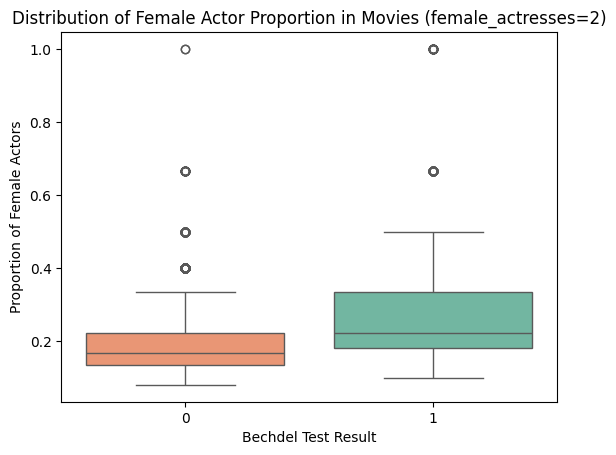

In [88]:
# Filter the DataFrame where 'female_actresses' is equal to 2
filtered_data = df_characters_merged[df_characters_merged['female_actresses'] == 2]

# Set color palette
palette = {'1': '#66c2a5', '0': '#fc8d62'}

# Create a box plot with custom colors
sns.boxplot(x='Bechdel pass', y='female_actor_proportion', data=filtered_data, palette=palette)

# Set labels and title
plt.xlabel('Bechdel Test Result')
plt.ylabel('Proportion of Female Actors')
plt.title('Distribution of Female Actor Proportion in Movies (female_actresses=2)')

# Show plot
plt.show()


In [89]:
# Group by 'female_actresses' and calculate the proportion of movies passing the Bechdel test for each group
proportion_by_female_actors_pass = df_characters_merged_bymovie.groupby('female_actresses')['Bechdel pass'].mean()

# Print the result
print(proportion_by_female_actors_pass)

female_actresses
0     0.159184
1     0.279895
2     0.422127
3     0.502183
4     0.609536
5     0.643678
6     0.667401
7     0.763514
8     0.839286
9     0.805970
10    0.897196
11    0.880000
12    0.837838
13    0.863636
14    0.857143
15    0.933333
16    0.875000
17    1.000000
18    1.000000
19    1.000000
20    1.000000
21    1.000000
22    1.000000
23    1.000000
25    0.000000
26    1.000000
28    0.000000
29    1.000000
Name: Bechdel pass, dtype: float64


Movies with 25 and 28 female actresses are anomalies here...we can learn more about this by looking at the specific movies.

In [90]:
# Calculate the correlation coefficient
correlation_coefficient = df_characters_merged['female_actresses'].corr(df_characters_merged['Bechdel pass'])

Correlation coefficient: 0.7373828058395802

We can observe that there is a pretty strong correlation when it comes to number of female actresses starring in a movie vs. the movie passing the Bechdel Test or not.

Let's now load the directors dataset provided by the author to gain information about the gender of the director of the movie

###*Q.* Is there a correlation between the gender of the director of the movie vs whether the movies passes the Bechdel Test or not?

In [91]:
# load the dataframe df_directors that contains for a movie the name of the director and his/her gender
df_directors = pd.read_csv('/content/drive/My Drive/Datasets/all_directors_gender.csv', header=0)
df_directors.shape

(5056, 10)

In [92]:
df_directors.head(3)

,year,name,country,budget,gross,runtime,director,language,released,gender
0,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,John Woo,['English'],2000/05/24,male
1,2000,Gladiator,"['United Kingdom', 'United States']",103000000,460500000,155,Ridley Scott,['English'],2000/05/01,male
2,2000,Cast Away,['United States'],90000000,429600000,143,Robert Zemeckis,['English'],2000/12/22,male


In [93]:
# Check for weird values in years values
years_range = df_directors['year'].unique()
print("years : ", years_range)
print("years range :", min(years_range), "-", max(years_range))
# Filter out rows where 'year' is equal to 202013
df_directors = df_directors[df_directors['year'] != 202013]
df_directors.shape
years_range = df_directors['year'].unique()
print("years :", years_range)
print("years range:", min(years_range), "-", max(years_range))

# Check for weird values in gender category
gender = df_directors['gender'].unique()
print("values for gender : ", gender)

years :  [  2000   2001   2002   2003   2004   2005   2006   2007   2008   2009
   2010   2011   2012   2013 202013   2014   2015   2016   2017   2018]
years range : 2000 - 202013
years : [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
years range: 2000 - 2018
values for gender :  ['male' 'female' 'unknown']


In [94]:
df = merged_df


In [95]:
# Merge based on matching values in 'year' and 'title'
df_merged = pd.merge(df, df_directors[['year', 'name', 'director', 'gender']],
                     left_on=['year_x', 'title'],
                     right_on=['year', 'name'],
                     how='inner')

# Drop the redundant columns
df_merged = df_merged.drop(['year_y', 'name'], axis=1)

In [96]:
df_merged.head(3)

,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year,director,gender
0,4369,324133.0,2003,3,983,Swimming Pool,950429.0,950429,/m/03sq24,Swimming Pool,2003-05-18,22441323.0,103.0,"[French Language, English Language]","[France, United Kingdom]","[Thriller, Crime Fiction, Indie, World cinema,...",2003,Fran\xc3\xa7ois Ozon,unknown
1,3801,199753.0,2000,0,15,Red Planet,1494502.0,1494502,/m/055stg,Red Planet,2000-11-10,33463969.0,108.0,[English Language],"[United States of America, Australia]","[Thriller, Disaster, Science Fiction, Adventur...",2000,Antony Hoffman,male
2,3803,144084.0,2000,3,64,American Psycho,4846576.0,4846576,/m/0cqr0q,American Psycho,2000-01-21,34266564.0,102.0,"[Spanish Language, English Language, Cantonese]",[United States of America],"[Thriller, Crime Thriller, Horror, Psychologic...",2000,Mary Harron,female


Removing the unknown gender values from the dataset

In [97]:
# Filter rows with 'gender' equal to 'male' or 'female'
df_filtered = df_merged[df_merged['gender'].isin(['male', 'female'])]
df_filtered.head(3)

,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year,director,gender
1,3801,199753.0,2000,0,15,Red Planet,1494502.0,1494502,/m/055stg,Red Planet,2000-11-10,33463969.0,108.0,[English Language],"[United States of America, Australia]","[Thriller, Disaster, Science Fiction, Adventur...",2000,Antony Hoffman,male
2,3803,144084.0,2000,3,64,American Psycho,4846576.0,4846576,/m/0cqr0q,American Psycho,2000-01-21,34266564.0,102.0,"[Spanish Language, English Language, Cantonese]",[United States of America],"[Thriller, Crime Thriller, Horror, Psychologic...",2000,Mary Harron,female
3,3804,164052.0,2000,3,78,Hollow Man,1332901.0,1332901,/m/04th45,Hollow Man,2000-08-02,190213455.0,119.0,[English Language],"[United States of America, Germany]","[Thriller, Science Fiction, Horror, Sci-Fi Hor...",2000,Paul Verhoeven,male


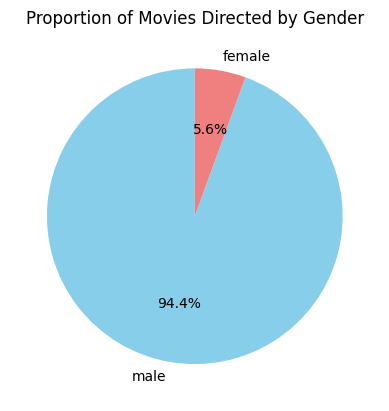

In [98]:
# Count the number of movies directed by each gender
gender_counts = df_filtered['gender'].value_counts()

# Plot a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Movies Directed by Gender')

# Show the plot
plt.show()

It's a sad reality, but we can observe that only 5.6% of the movies have been directed by women :(

In [99]:
gender_counts

gender
male      1069
female      63
Name: count, dtype: int64

In [100]:
# Calculate the proportions for each rating category for male directors
male_proportions = df_filtered[df_filtered['gender'] == 'male']['rating'].value_counts(normalize=True) * 100
female_proportions = df_filtered[df_filtered['gender'] == 'female']['rating'].value_counts(normalize=True) * 100

# Calculate the proportions for each rating category
directors_gender_prop = pd.merge(male_proportions, female_proportions, on=['rating'], how='outer')
directors_gender_prop.head(3)

,proportion_x,proportion_y
rating,,
3,52.946679,77.777778
1,28.624883,19.047619
2,10.102900,1.587302


<Figure size 1200x600 with 0 Axes>

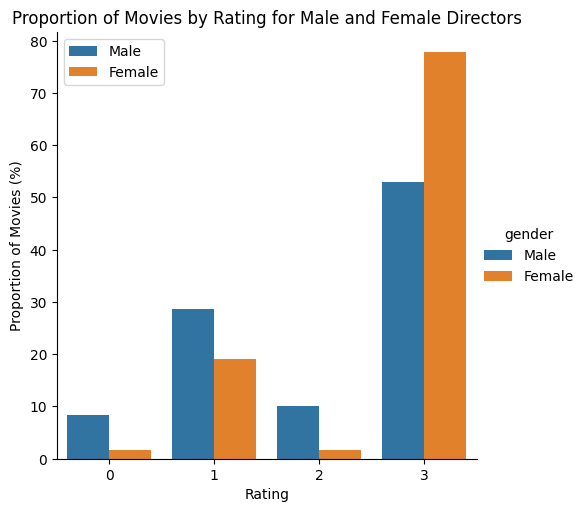

In [101]:
# Calculate the proportions for each rating category
male_proportions = df_filtered[df_filtered['gender'] == 'male']['rating'].value_counts(normalize=True) * 100
female_proportions = df_filtered[df_filtered['gender'] == 'female']['rating'].value_counts(normalize=True) * 100

directors_gender_prop = pd.merge(male_proportions, female_proportions, on=['rating'], how='outer')
directors_gender_prop = directors_gender_prop.reset_index()

#Reset index and rename columns
directors_gender_prop = directors_gender_prop.rename(columns={ 'proportion_x': 'Male', 'proportion_y': 'Female'})
#directors_gender_prop = directors_gender_prop.reset_index(drop=True)
directors_gender_prop

directors_gender_prop = pd.melt(directors_gender_prop, id_vars='rating', var_name='gender', value_name='proportion')


# Set up the plot
plt.figure(figsize=(12, 6))

# Plot for both male and female directors
sns.catplot(x='rating', y='proportion', hue='gender', data=directors_gender_prop, kind='bar', height=5, aspect=1)

plt.xlabel('Rating')
plt.ylabel('Proportion of Movies (%)')
plt.title('Proportion of Movies by Rating for Male and Female Directors')

plt.legend()
plt.show()

Very interesting indeed! Movies directed by female writers based on this graph are more likely to pass the Bechdel test!

In [102]:
# Convert gender to numeric values (1 for 'male' and 0 for 'female')
df_filtered['gender_numeric'] = df_filtered['gender'].map({'male': 1, 'female': 0})

# Calculate the correlation coefficient
correlation_coefficient = df_filtered['rating'].corr(df_filtered['gender_numeric'])

Correlation coefficient between pass/fail and gender of movie director: -0.4031989005954049

A somewhat strong negative correlation. Here, negative correlation implies that as the gender becomes '0' which is female the movie is more likely to be '1', i.e. pass the Bechdel Test. I am sure, if we had more data about female directed movies the observed correlation would have been even higher.

###*Q.* Do Bechdel Test Ratings differ across different genres of the movies?

In [103]:
# Create a new column 'bechdel_pass' based on the bechdelRating
merged_df['bechdel_pass'] = merged_df['rating'].apply(lambda x: 'Pass' if x == 3 else 'Fail')
merged_df.head()

,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y,bechdel_pass
0,2,2221420.0,1878,0,9603,Sallie Gardner at a Gallop,26044155.0,26044155,/m/0b6f62m,Sallie Gardner at a Gallop,NaT,NaN,0.05,[Silent film],[United States of America],"[Short Film, Silent film]",NaN,Fail
1,13,392728.0,1888,0,8040,Roundhay Garden Scene,1082508.0,1082508,/m/044ggd,Roundhay Garden Scene,NaT,NaN,0.03,[Silent film],[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",NaN,Fail
2,18,466876.0,1889,0,9619,"Leisurely Pedestrians, Open Topped Buses and H...",12170539.0,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",NaT,NaN,NaN,"[Silent film, English Language]",[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",NaN,Fail
3,19,2116898.0,1889,0,9945,Hyde Park Corner,12170539.0,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",NaT,NaN,NaN,"[Silent film, English Language]",[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",NaN,Fail
4,20,361921.0,1890,0,9617,"Monkeyshines, No. 1",6431996.0,6431996,/m/0g53t3,"Monkeyshines, No. 1",NaT,NaN,NaN,[Silent film],[United States of America],[Silent film],NaN,Fail


#### Plotting the Bechdel pass vs. fail results across different movie genres

In [104]:
def plot_bechdel_proportion(genres, genre_label):
    # Filter the DataFrame to include only movies with the specified genre(s)
    genre_movies = merged_df[merged_df['Movie genres (Freebase ID:name tuples)'].apply(lambda x: any(genre.lower() in [g.lower() for g in x] for genre in genres))]

    # Calculate the proportion of pass/fail for the specified genre(s)
    genre_bechdel = genre_movies.groupby('bechdel_pass').size() / len(genre_movies)

    # Plot the proportion of pass/fail for the specified genre(s)
    genre_bechdel.plot(kind='bar', rot=0, figsize=(8, 6))
    plt.title(f'Proportion of Pass/Fail for {genre_label} Movies (Bechdel Test)')
    plt.xlabel('Bechdel Test Result')
    plt.ylabel('Proportion')
    plt.show()

#### Political Drama

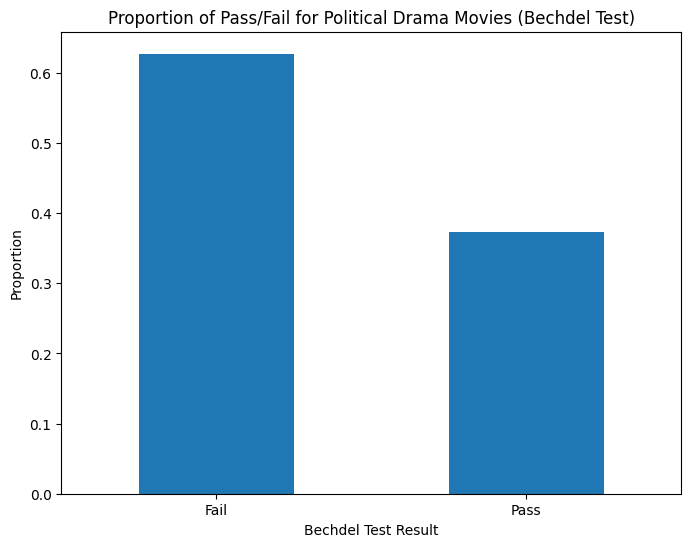

In [105]:
plot_bechdel_proportion(['Political Drama'], 'Political Drama')

#### Comedy

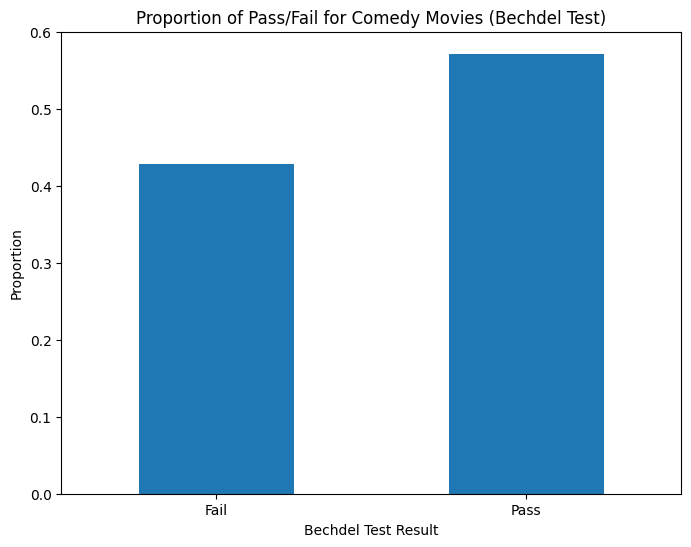

In [106]:
plot_bechdel_proportion(['Comedy'], 'Comedy')

#### Drama

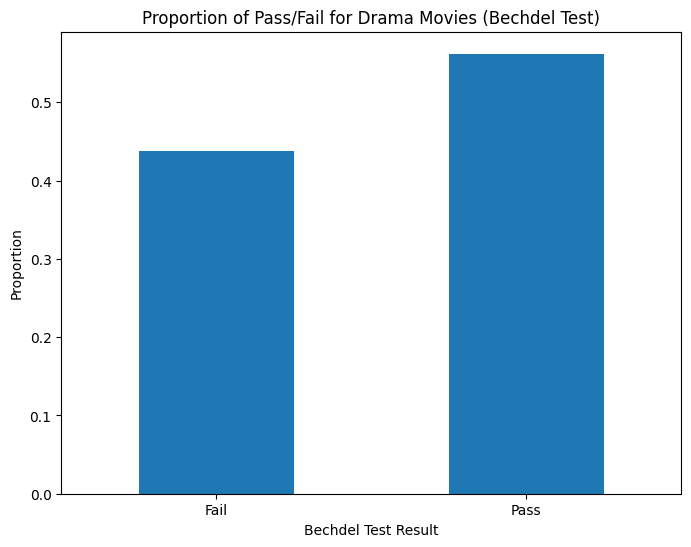

In [107]:
plot_bechdel_proportion(['Drama'], 'Drama')

#### Animation

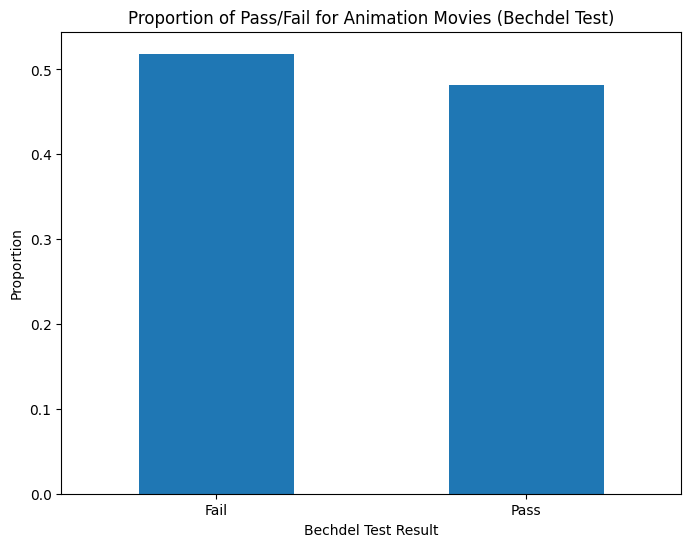

In [108]:
plot_bechdel_proportion(['Animation'], 'Animation')

#### LGBT

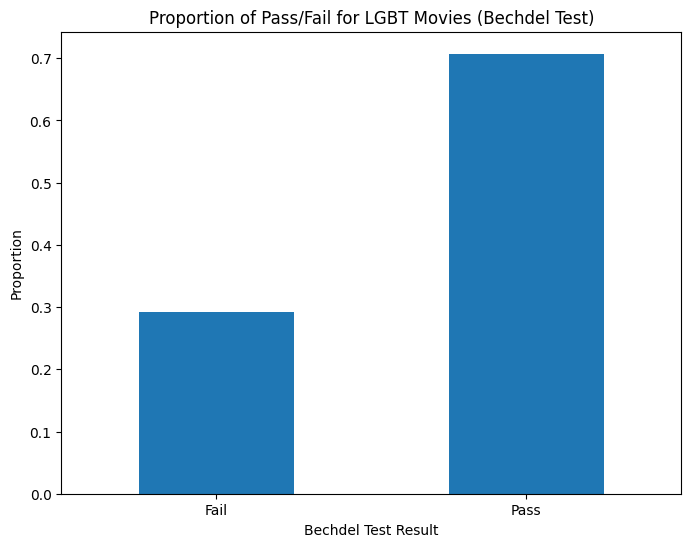

In [109]:
plot_bechdel_proportion(['LGBT'], 'LGBT')

#### Teen

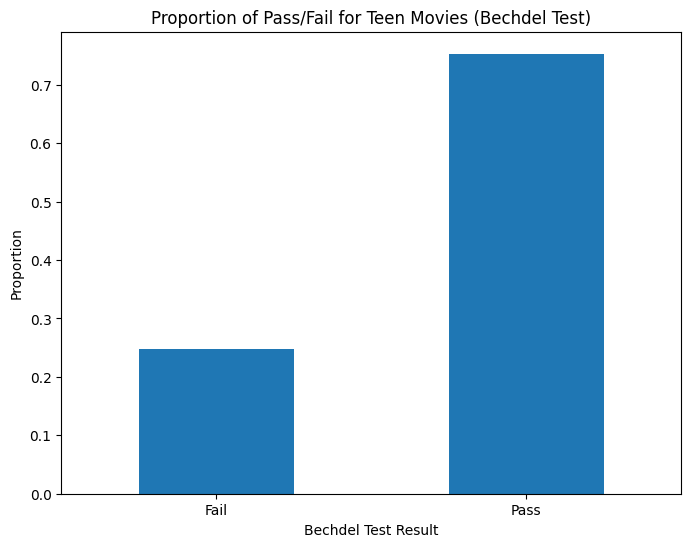

In [110]:
plot_bechdel_proportion(['Teen'], 'Teen')

#### Biographical

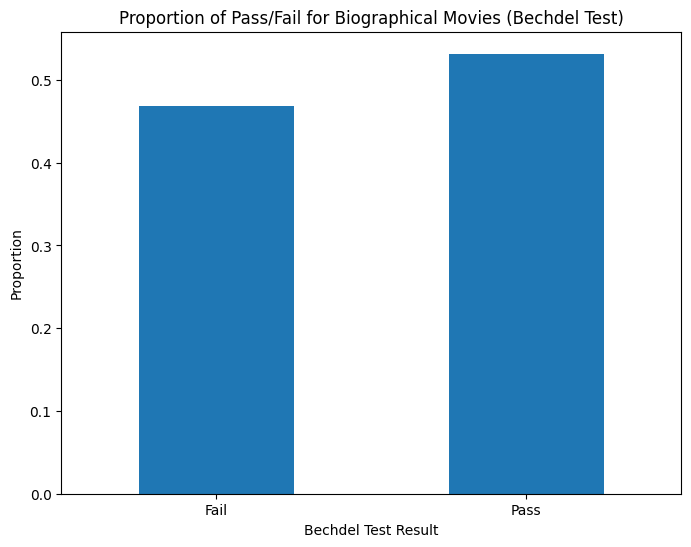

In [111]:
plot_bechdel_proportion(['Biography'], 'Biographical')

#### Adventure

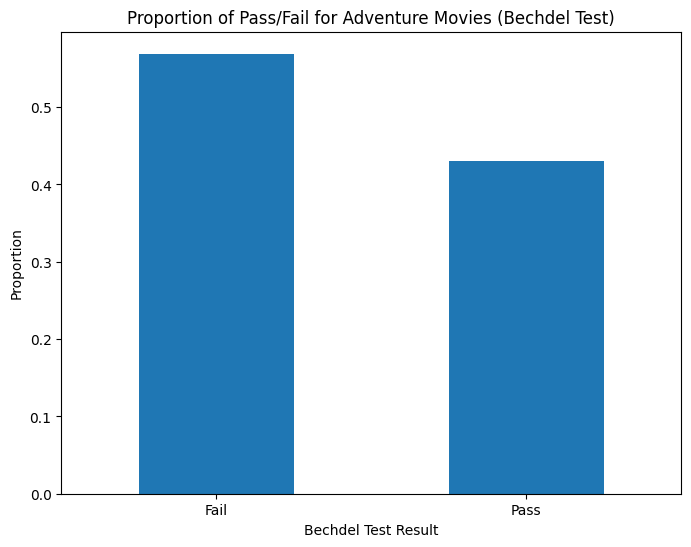

In [113]:
plot_bechdel_proportion(['Adventure'], 'Adventure')

#### Action

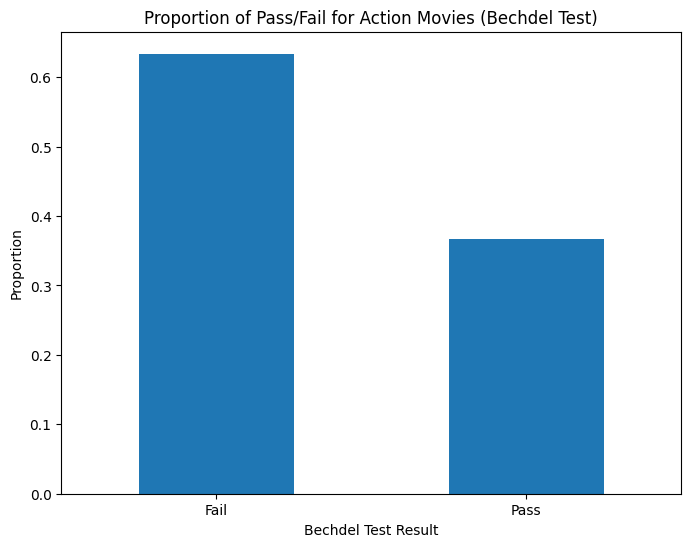

In [114]:
plot_bechdel_proportion(['Action'], 'Action')

#### Superhero

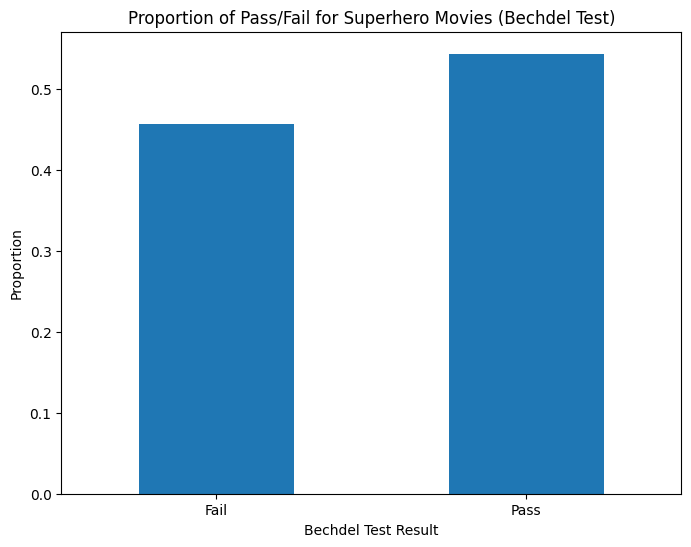

In [115]:
plot_bechdel_proportion(['Superhero'], 'Superhero')

#### Thriller

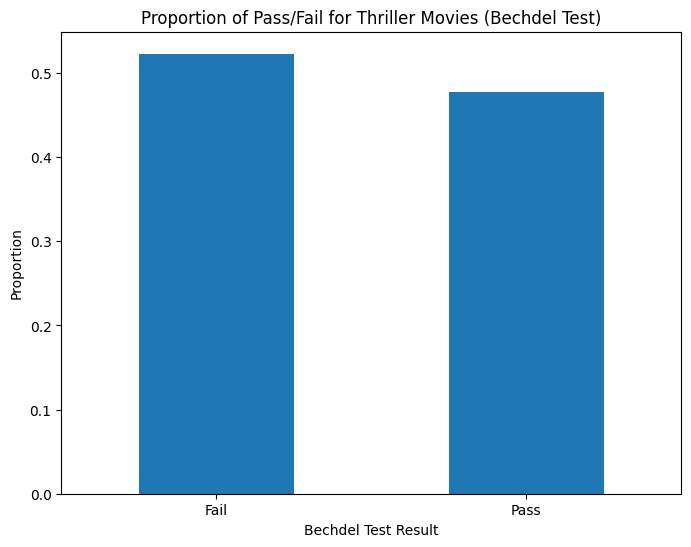

In [126]:
plot_bechdel_proportion(['Thriller'], 'Thriller')

Indeed, some genres seem more likely to passs the Bechdel test as compared to others

### Graph Visualization

One interesting approach could be to create a bipartite graph, where one set of nodes represents movies, and the other set represents genres. We can then connect a movie node to a genre node if the movie belongs to that genre, and use the Bechdel test rating as an attribute for the movie nodes.

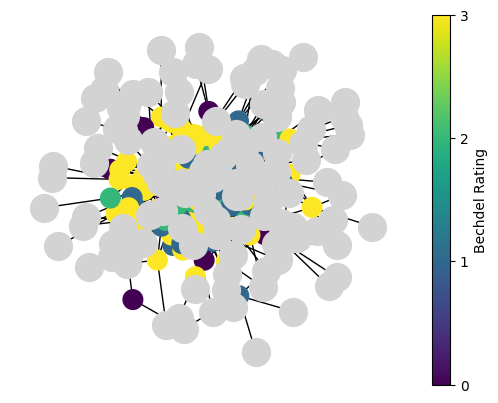

In [116]:
def visualize_bipartite_graph(merged_df, num_movies=50):
    # Create a bipartite graph
    bipartite_graph = nx.Graph()

    # Add movie nodes
    movie_subset = merged_df.sample(num_movies, random_state=42)
    for _, row in movie_subset.iterrows():
        movie_node = f"Movie: {row['Movie name']} ({row['rating']})"
        bipartite_graph.add_node(movie_node, bipartite=0, rating=row['rating'])

    # Add genre nodes
    genres = set()
    for genre_list in movie_subset['Movie genres (Freebase ID:name tuples)']:
        for genre in genre_list:
            genres.add(genre)

    for genre in genres:
        bipartite_graph.add_node(f"Genre: {genre}", bipartite=1)

    # Add edges between movies and genres
    for _, row in movie_subset.iterrows():
        movie_node = f"Movie: {row['Movie name']} ({row['rating']})"
        for genre in row['Movie genres (Freebase ID:name tuples)']:
            genre_node = f"Genre: {genre}"
            bipartite_graph.add_edge(movie_node, genre_node)

    # Draw the bipartite graph
    pos = nx.spring_layout(bipartite_graph, k=0.15, iterations=50)

    # Separate nodes by bipartite set
    movie_nodes = [node for node, data in bipartite_graph.nodes(data=True) if data['bipartite'] == 0]
    genre_nodes = [node for node, data in bipartite_graph.nodes(data=True) if data['bipartite'] == 1]

    # Draw nodes and edges
    node_colors = [data['rating'] for node, data in bipartite_graph.nodes(data=True) if data['bipartite'] == 0]
    cmap = plt.get_cmap('viridis')
    nx.draw_networkx_nodes(bipartite_graph, pos, nodelist=movie_nodes, node_color=[cmap(rating / 3) for rating in node_colors], node_size=200)
    nx.draw_networkx_nodes(bipartite_graph, pos, nodelist=genre_nodes, node_color='lightgray', node_size=400)
    nx.draw_networkx_edges(bipartite_graph, pos)

    # Add legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=3))
    plt.colorbar(sm, ticks=[0, 1, 2, 3], label='Bechdel Rating')

    plt.axis('off')
    plt.show()


visualize_bipartite_graph(merged_df, num_movies=100)

This was only meant for visualization purposes

# Sentiment Analysis vs. Movie plots

## Merging the dataset

In [117]:
merged_with_plots_df = pd.merge(merged_df, plot_summaries, left_on='Wikipedia movie ID', right_on='wiki_movie_id', how='left')
merged_with_plots_df.head()

,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y,bechdel_pass,wiki_movie_id,plot_summary
0,2,2221420.0,1878,0,9603,Sallie Gardner at a Gallop,26044155.0,26044155,/m/0b6f62m,Sallie Gardner at a Gallop,NaT,NaN,0.05,[Silent film],[United States of America],"[Short Film, Silent film]",NaN,Fail,NaN,NaN
1,13,392728.0,1888,0,8040,Roundhay Garden Scene,1082508.0,1082508,/m/044ggd,Roundhay Garden Scene,NaT,NaN,0.03,[Silent film],[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",NaN,Fail,NaN,NaN
2,18,466876.0,1889,0,9619,"Leisurely Pedestrians, Open Topped Buses and H...",12170539.0,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",NaT,NaN,NaN,"[Silent film, English Language]",[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",NaN,Fail,NaN,NaN
3,19,2116898.0,1889,0,9945,Hyde Park Corner,12170539.0,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",NaT,NaN,NaN,"[Silent film, English Language]",[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",NaN,Fail,NaN,NaN
4,20,361921.0,1890,0,9617,"Monkeyshines, No. 1",6431996.0,6431996,/m/0g53t3,"Monkeyshines, No. 1",NaT,NaN,NaN,[Silent film],[United States of America],[Silent film],NaN,Fail,NaN,NaN


## Preprocessing the plot summaries using NLP Pipeline

In [118]:
# Merge dataframes
merged_with_plots_df = pd.merge(merged_df, plot_summaries, left_on='Wikipedia movie ID', right_on='wiki_movie_id', how='left')

# Preprocess text
# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define function to preprocess text
def preprocess_text(text):
    # Check if text is NaN or not a string
    if pd.isna(text) or not isinstance(text, str):
        return ''
    # Tokenize text into words and convert to lowercase
    tokens = word_tokenize(text.lower())
    # Filter out stop words and perform stemming
    filtered_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    # Join filtered tokens back into a string
    return ' '.join(filtered_tokens)

# Apply preprocessing function to 'plot_summary' column and create a new column 'processed_summaries'
merged_with_plots_df['processed_summaries'] = merged_with_plots_df['plot_summary'].apply(lambda x: preprocess_text(str(x)))


## Calculating and Plotting the sentiment scores

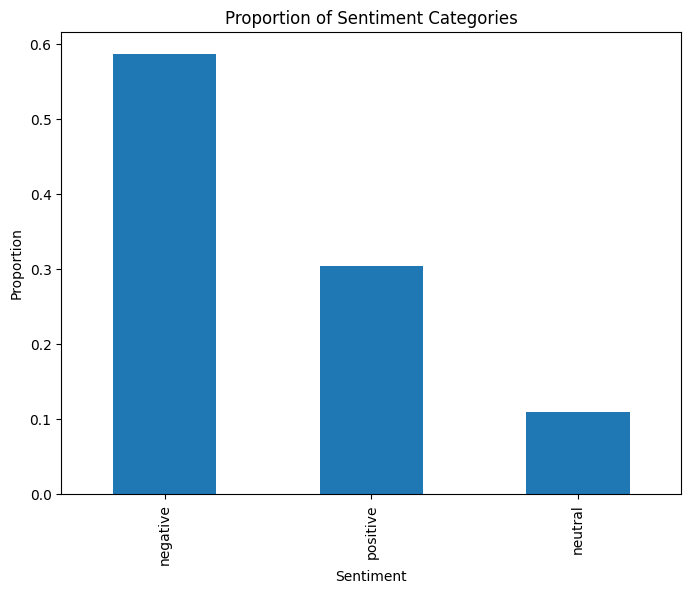

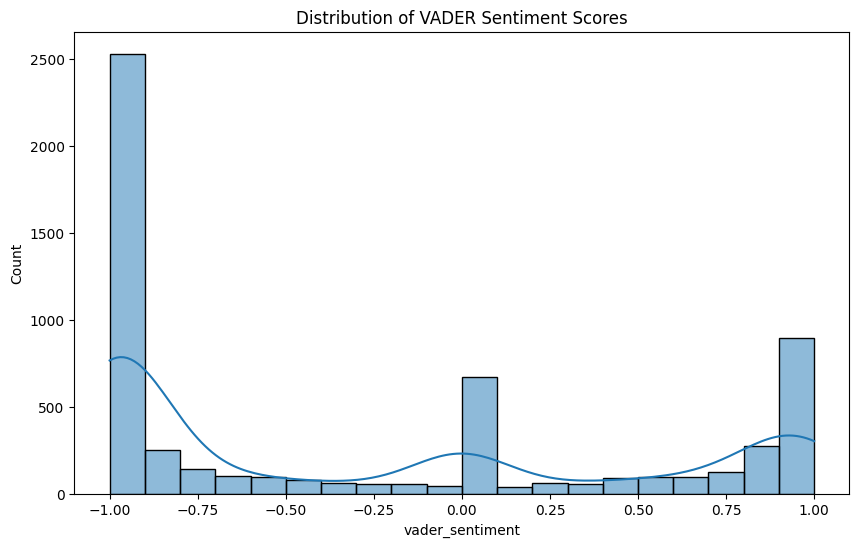

In [119]:

# Sentiment analysis using VADER
# Initialize VADER SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Define function to calculate VADER sentiment score
def vader_sentiment(text):
    # Get sentiment scores using VADER
    scores = sid.polarity_scores(text)
    # Return compound score (overall sentiment)
    return scores['compound']

# Apply VADER sentiment analysis to 'processed_summaries' column and create a new column 'vader_sentiment'
merged_with_plots_df['vader_sentiment'] = merged_with_plots_df['processed_summaries'].apply(vader_sentiment)

# Visualizations
# Sentiment proportion
# Calculate counts of positive, negative, and neutral sentiment
sentiment_counts = merged_with_plots_df['vader_sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')).value_counts()
# Calculate proportions of each sentiment category
sentiment_proportions = sentiment_counts / len(merged_with_plots_df)

# Plot bar chart of sentiment proportions
plt.figure(figsize=(8, 6))
sentiment_proportions.plot(kind='bar')
plt.title('Proportion of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.show()

# Histogram of VADER sentiment scores
# Plot histogram of VADER sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_with_plots_df, x="vader_sentiment", bins=20, kde=True)
plt.title("Distribution of VADER Sentiment Scores")
plt.show()


##*Q.* Is there a correlation between the sentiment of the movie and the amount of revenue it generates?

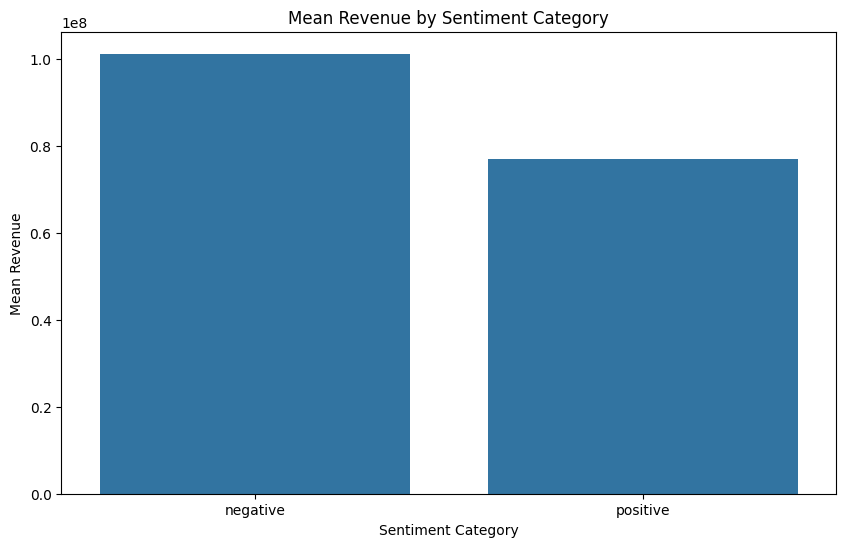

In [120]:
# Handle missing values
merged_with_plots_df.dropna(subset=['Movie box office revenue'], inplace=True)

# Group data by sentiment score
sentiment_groups = merged_with_plots_df.groupby(pd.cut(merged_with_plots_df['vader_sentiment'], bins=[-1, 0, 1], labels=['negative', 'positive']))

# Calculate revenue statistics for each sentiment category
revenue_stats = sentiment_groups['Movie box office revenue'].agg(['count', 'mean', 'median', 'sum'])

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_stats.index, y=revenue_stats['mean'])
plt.title('Mean Revenue by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Revenue')
plt.show()



The mean revenue of movies with negative sentiment is more than movies with positive sentiment. Strange observation. However, mean is not a robust statistic and this might be due to the presence of outliers.

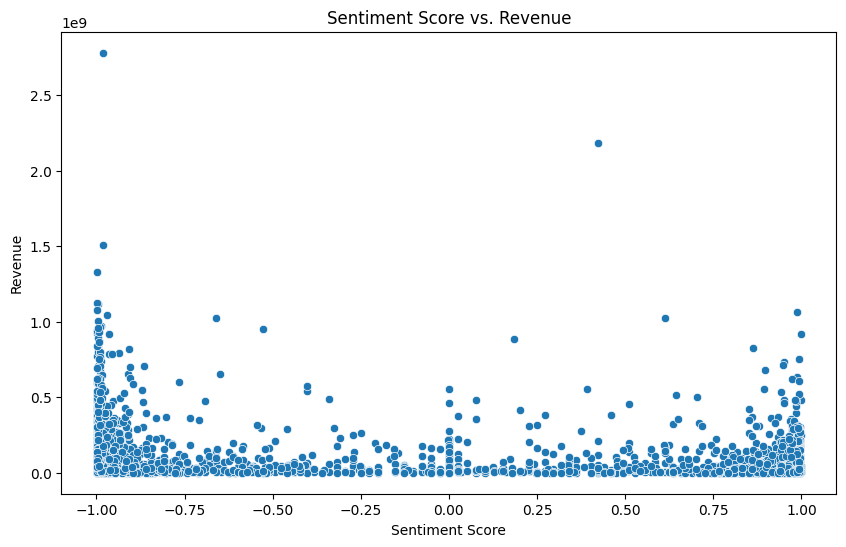

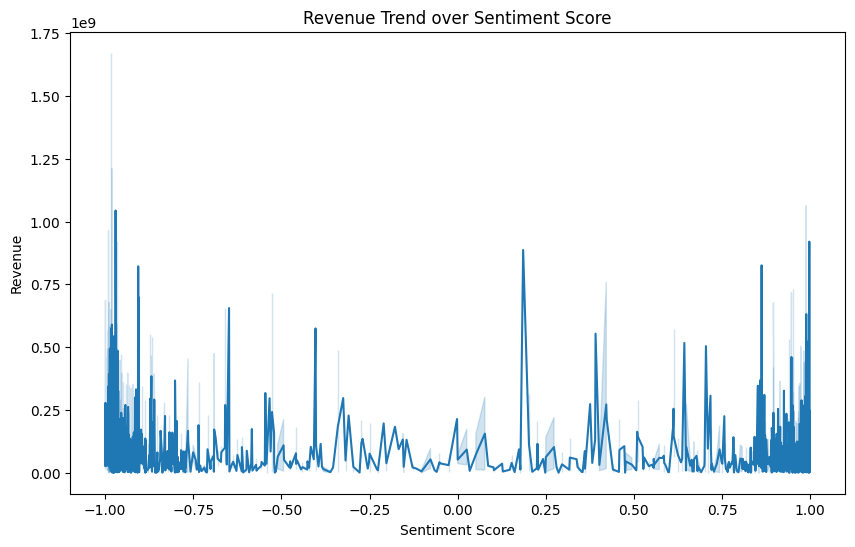

In [121]:
# Sentiment Score vs. Revenue Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vader_sentiment', y='Movie box office revenue', data=merged_with_plots_df)
plt.title('Sentiment Score vs. Revenue')
plt.xlabel('Sentiment Score')
plt.ylabel('Revenue')
plt.show()


# Revenue Trend over Sentiment Score
plt.figure(figsize=(10, 6))
sns.lineplot(x='vader_sentiment', y='Movie box office revenue', data=merged_with_plots_df)
plt.title('Revenue Trend over Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Revenue')
plt.show()


These plots show the distribution of the movie revenue across different sentiment values!

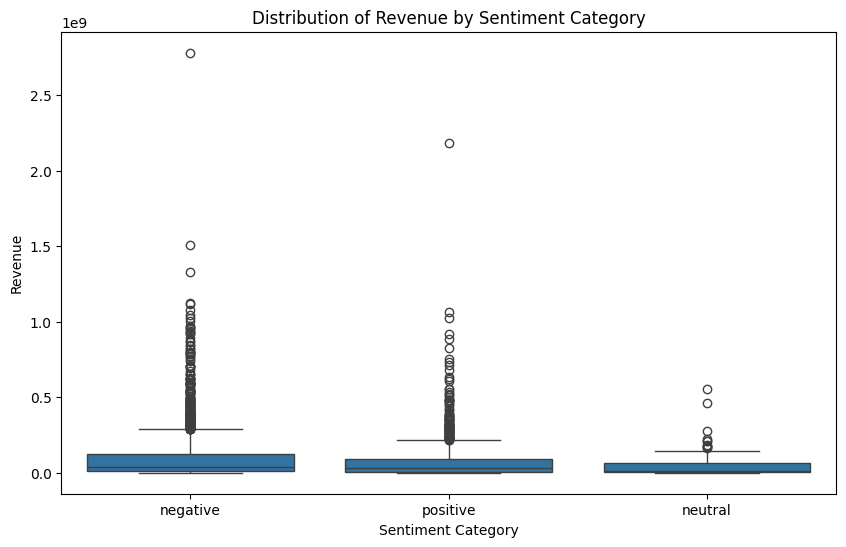

In [122]:
# Define a function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Add a new column to the DataFrame with sentiment categories
merged_with_plots_df['sentiment_category'] = merged_with_plots_df['vader_sentiment'].apply(categorize_sentiment)

# Visualize the comparison of sentiment vs. revenue using a box plot with the new column
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='Movie box office revenue', data=merged_with_plots_df)
plt.title('Distribution of Revenue by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Revenue')
plt.show()


As suspected, the negative sentiment movies have a lot of outlier values which pump up their average revenue. The robust statistics given by box plot show a very weak effect of the movie sentiment on the revenue earned by the movie. Let's verify this further by calculating the correlation coefficient as well

In [123]:
# Calculate correlation coefficient between sentiment score and movie revenue
correlation_coefficient = merged_with_plots_df['vader_sentiment'].corr(merged_with_plots_df['Movie box office revenue'])

print("Correlation coefficient between sentiment score and movie revenue:", correlation_coefficient)


Correlation coefficient between sentiment score and movie revenue: -0.0918400762415461


Although the plots suggest otherwise, there is very weak correlation between a movie having a negative sentiment vs. the movie earning greater revenue. This is probably due to the presence of some outliers for the negative sentiment movies.

This is the end of this notebook, it was a lot of fun working on this project.

# A beautiful poem

In [124]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Acknowledgement

In [127]:
print("A very special thanks to Prof. Pankaj Pansari for giving us the opportunity to work on this lovely project")

A very special thanks to Prof. Pankaj Pansari for giving us the opportunity to work on this lovely project


In [128]:
print("Thanks to Ankita ma'am and Sakshi ma'am as well for their constant support")

Thanks to Ankita ma'am and Sakshi ma'am as well for their constant support


In [129]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo

In [133]:
!cp "/content/drive/My Drive/Colab Notebooks/mini_project.ipynb" ./

In [134]:
!jupyter nbconvert --to PDF "mini_project.ipynb"

[NbConvertApp] Converting notebook mini_project.ipynb to PDF
[NbConvertApp] Support files will be in mini_project_files/
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory ./mini_project_files
[NbConvertApp] Making directory